In [1]:
import numpy as np
import datetime as dt
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('pubg.csv')

In [3]:
data.head()

Id         groupId         matchId  assists  boosts  \
0  7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1  eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2  1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3  4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4  315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
0         0.00      0              0      0         60  ...        0   
1        91.47      0              0      0         57  ...        0   
2        68.00      0              0      0         47  ...        0   
3        32.90      0              0      0         75  ...        0   
4       100.00      0              0      0         45  ...        0   

   rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
0        0.0000          0          0.00          0               0   
1        0.0045          0         11.04          0               0   
2        0.0000          0          0.00          0               0   
3        0.0000          0          0.00          0               0   
4        0.0000          0          0.00          0               0   

   walkDistance  weaponsAcquired  winPoints  winPlacePerc  
0        244.80                1       1466        0.4444  
1       1434.00                5          0        0.6400  
2        161.80                2          0        0.7755  
3        202.70                3          0        0.1667  
4         49.75                2          0        0.1875  

[5 rows x 29 columns]

In [4]:
data.tail()

Id         groupId         matchId  assists  boosts  \
4446961  afff7f652dbc10  d238e426f50de7  18492834ce5635        0       0   
4446962  f4197cf374e6c0  408cdb5c46b2ac  ee854b837376d9        0       1   
4446963  e1948b1295c88a  e26ac84bdf7cef  6d0cd12784f1ab        0       0   
4446964  cc032cdd73b7ac  c2223f35411394  c9c701d0ad758a        0       4   
4446965  0d8e7ed728b6fd  8c74f72fedf5ff  62a16aabcc095c        0       2   

         damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
4446961         0.00      0              0      0         74  ...        0   
4446962        44.15      0              0      0         69  ...        0   
4446963        59.06      0              0      0         66  ...        0   
4446964       180.40      1              1      2         11  ...        2   
4446965       268.00      0              0      1         18  ...        0   

         rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
4446961        1292.0          0         0.000          0               0   
4446962           0.0          0         0.000          0               0   
4446963           0.0          0         2.184          0               0   
4446964           0.0          0         0.000          0               0   
4446965        1369.0          0         0.000          0               0   

         walkDistance  weaponsAcquired  winPoints  winPlacePerc  
4446961        1019.0                3       1507        0.1786  
4446962          81.7                6          0        0.2935  
4446963         788.7                4          0        0.4815  
4446964        2748.0                8          0        0.8000  
4446965        1244.0                5          0        0.5464  

[5 rows x 29 columns]

In [5]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [6]:
data.shape

(4446966, 29)

# The given dataset has 4446966 rows And 29 columns


### Domain Analysis

Id: An identifier or unique identifier for each record.

groupId: Identifier for a group within a match.

matchId: Identifier for a specific match.

assists: The number of assists a player had. Assists occur when a player contributes to killing an opponent but doesn't make the final kill.

boosts: The number of boost items used by the player during the match. Boost items typically increase health or energy.

damageDealt: The total amount of damage dealt by the player to opponents.

DBNOs: "DBNO" stands for "Down But Not Out." It represents the number of times the player was knocked down during the match but not eliminated.

headshotKills: The number of kills achieved by hitting opponents in the head.

heals: The number of healing items or actions used by the player.

killPlace: The player's ranking in terms of the number of kills.

killPoints: Points awarded based on the number of kills.

kills: The total number of kills made by the player.

killStreaks: The longest kill streak achieved during the match.

longestKill: The longest distance at which a kill was made by the player.

matchDuration: The duration of the match in seconds.

matchType: The type or mode of the match (e.g., solo, duo, squad).

maxPlace: The maximum possible number of places in the match.

numGroups: The number of groups in the match.

rankPoints: Ranking points awarded to players.

revives: The number of times the player revived teammates.

rideDistance: The total distance traveled by vehicle (in meters).

roadKills: The number of kills made by running over opponents with a vehicle.

swimDistance: The total distance traveled by swimming (in meters).

teamKills: The number of times the player killed teammates (not typically encouraged).

vehicleDestroys: The number of vehicles destroyed by the player.

walkDistance: The total distance traveled on foot (in meters).

weaponsAcquired: The number of weapons acquired by the player.

winPoints: Points awarded for winning the match.

winPlacePerc: The target variable; it represents the player's final placement in the match as a percentage (e.g., 0.75 means the player placed 75th).

In [7]:
# Load your large dataset, assuming it's in a CSV file
data = pd.read_csv('pubg.csv')

# Calculate the number of rows for the 40% subset
pubg_data_size = int(0.2 * len(data))

# Use pandas' sample method to create a random 30% subset
pubg_data = data.sample(n=pubg_data_size, random_state=42)  # Use a fixed random_state for reproducibility

# Save the subset to a new CSV file if needed
pubg_data.to_csv('pubg_data.csv', index=False)


# Kills

In [8]:
print("The average person kills {:.4f} players\n 99% of people have {} kills or less\n while the most kills ever recorded is {}.".format(pubg_data['kills'].mean(),pubg_data['kills'].quantile(0.99), pubg_data['kills'].max()))


The average person kills 0.9231 players
 99% of people have 7.0 kills or less
 while the most kills ever recorded is 55.


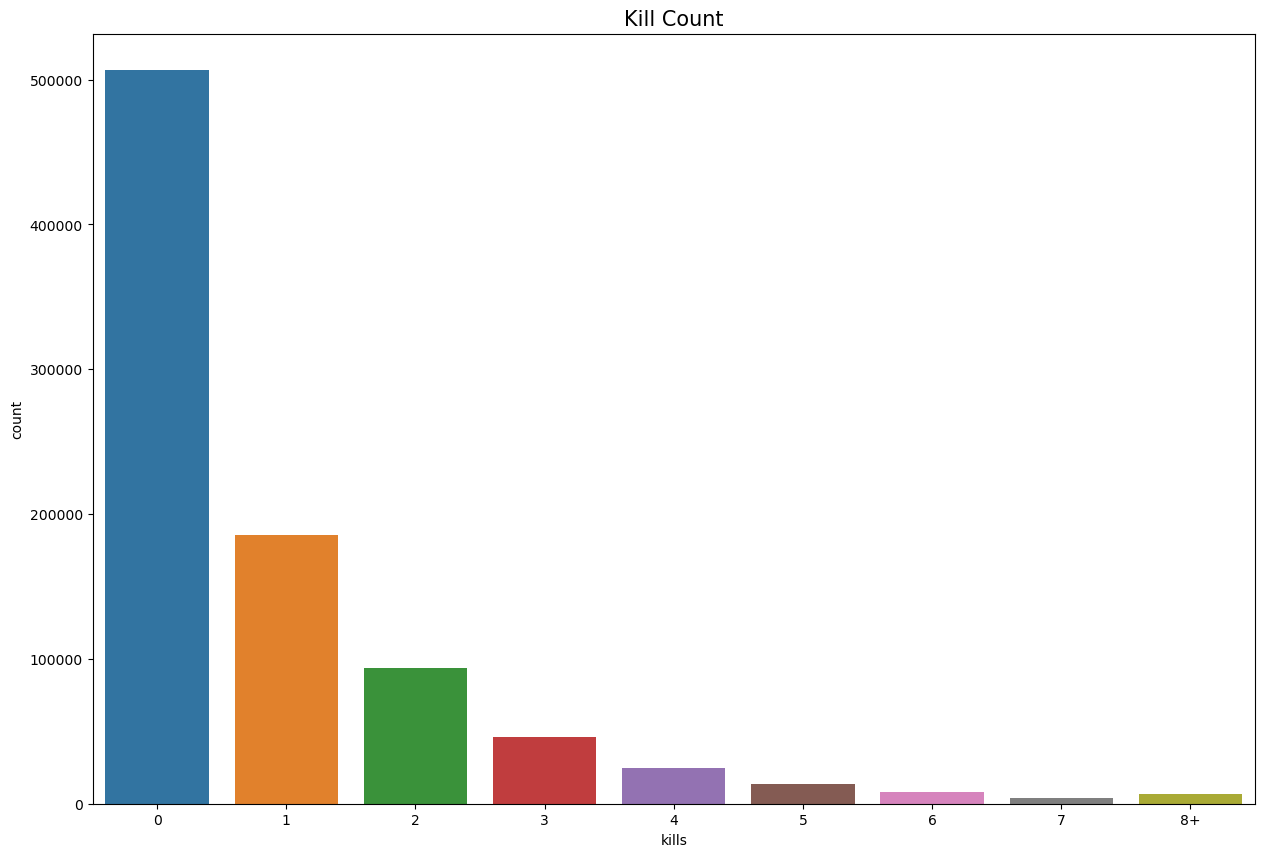

In [9]:
y=pubg_data.copy()
y['kills'] = y['kills'].astype(int)
y.loc[y['kills'] > y['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,10))
sns.countplot(x=y['kills'].astype('str').sort_values(),data=pubg_data)
plt.title("Kill Count",fontsize=15)
plt.show()

# Insights: 

Hence most people didnot make any kills lets see that they have any damage dealts

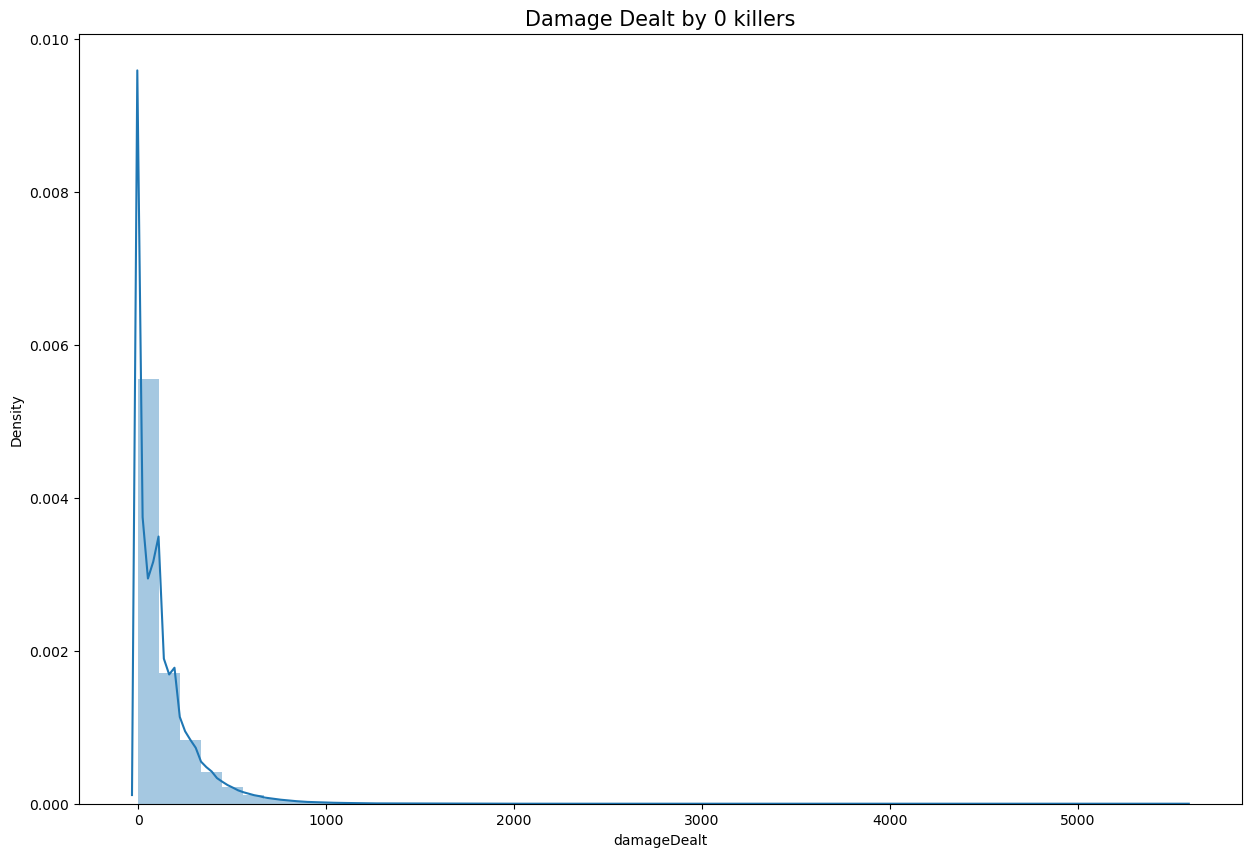

In [10]:
y=pubg_data.copy()
y[y['kills']==0]

plt.figure(figsize=(15,10))
plt.title("Damage Dealt by 0 killers",fontsize=15)
sns.distplot(y['damageDealt'])
plt.show()


In [11]:
y=pubg_data.copy()
f=y.loc[(y['winPlacePerc']==1) & (y['damageDealt']==0)]
g=y.loc[(y['winPlacePerc']==1) & (y['kills']==0)]
print('number of players win with 0 damage:',len(f))
print('number of players win with 0 kills:',len(g))

number of players win with 0 damage: 959
number of players win with 0 kills: 3361


In [12]:
per_k=len(g)/len(y['kills'])*100
per_k
print(f"the percentage is 0 kills: {per_k:.2f}%")
per_d=len(f)/len(y['damageDealt'])*100
per_d
print(f"the percentage is 0 damage : {per_d:.2f}%")

the percentage is 0 kills: 0.38%
the percentage is 0 damage : 0.11%


# Runners

In [13]:
y=pubg_data.copy()
print("the average walk taken {:.4f} m by players\n99% of people walked for {} m or less\nwhereas marathoner for {} m.".format(y['walkDistance'].mean(),y['walkDistance'].quantile(0.99),y['walkDistance'].max()))


the average walk taken 1152.5450 m by players
99% of people walked for 4389.0 m or less
whereas marathoner for 15370.0 m.


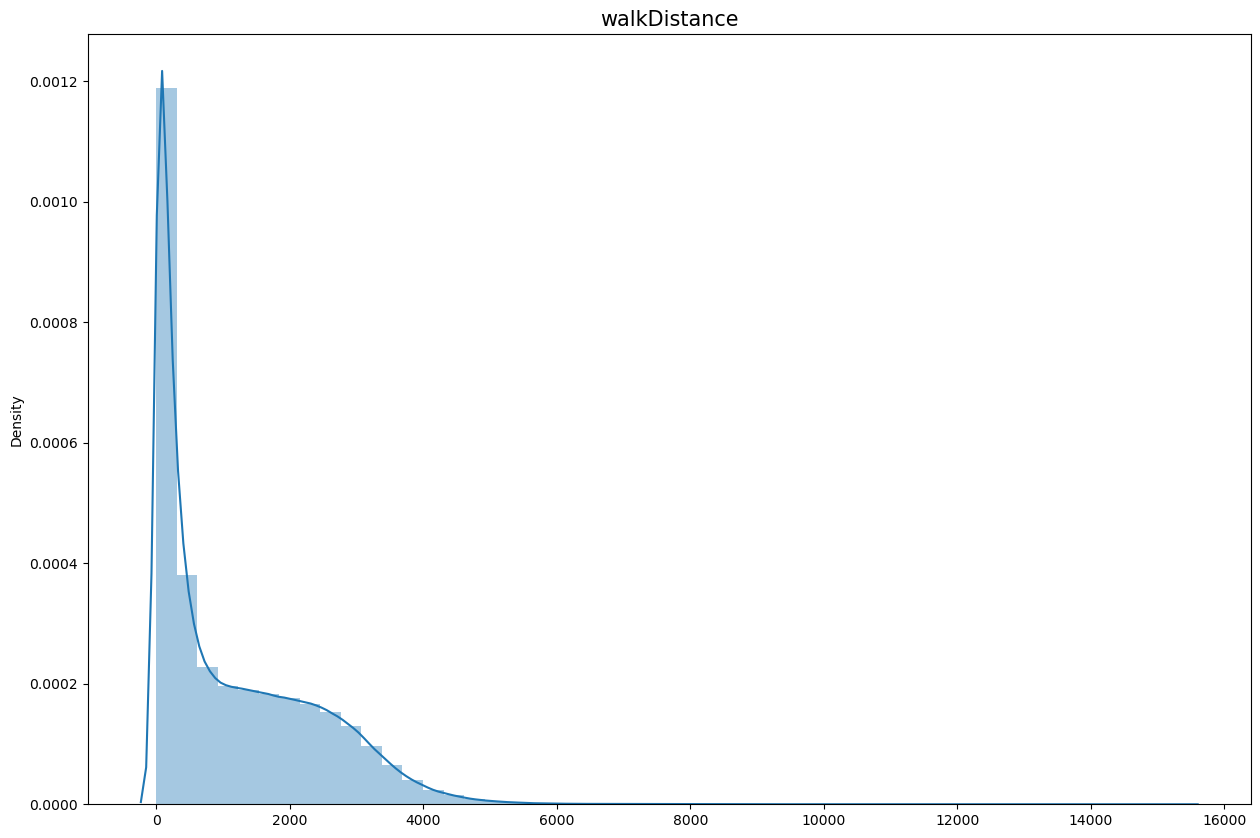

In [14]:
y=pubg_data.copy()

y.loc[y['walkDistance'] < y['walkDistance'].quantile(0.99)] 
plt.figure(figsize=(15,10))
sns.distplot(x=y['walkDistance'])
plt.title("walkDistance",fontsize=15)
plt.show()

## Walk Distance

In [15]:
print("{} players ({:.4f}%) walked 0 meters. This means that they die before even taking a step or they are afk (more possible).".format(len(y[y['walkDistance'] == 0]), 100*len(y[y['walkDistance']==0])/len(y)))


20009 players (2.2497%) walked 0 meters. This means that they die before even taking a step or they are afk (more possible).


In [16]:
y=pubg_data.copy()
o=y.loc[(y['winPlacePerc']==1) & (y['walkDistance']==0)]
u=y.loc[(y['winPlacePerc']==1) & (y['walkDistance']==0) & (y['kills']>0)]
print('number of players win with 0 walk distance:',len(o))
print('number of players win with 0 walk and  kills:',len(u))

number of players win with 0 walk distance: 209
number of players win with 0 walk and  kills: 40


In [17]:
a=pubg_data.loc[(pubg_data['walkDistance']==0)]

print('number of players win with 0 :',len(a))

number of players win with 0 : 20009


In [18]:
per_w=len(a)/len(pubg_data)*100
per_w
print(f"the percentage is 0 walked: {per_w:.2f}%")

the percentage is 0 walked: 2.25%


In [19]:
print("the average walk taken {:.4f} m by players\n99% of people walked for {} m or less\nwhereas marathoner for {} m.".format(y['rideDistance'].mean(),y['rideDistance'].quantile(0.99),y['rideDistance'].max()))


the average walk taken 604.6076 m by players
99% of people walked for 6966.0 m or less
whereas marathoner for 35400.0 m.


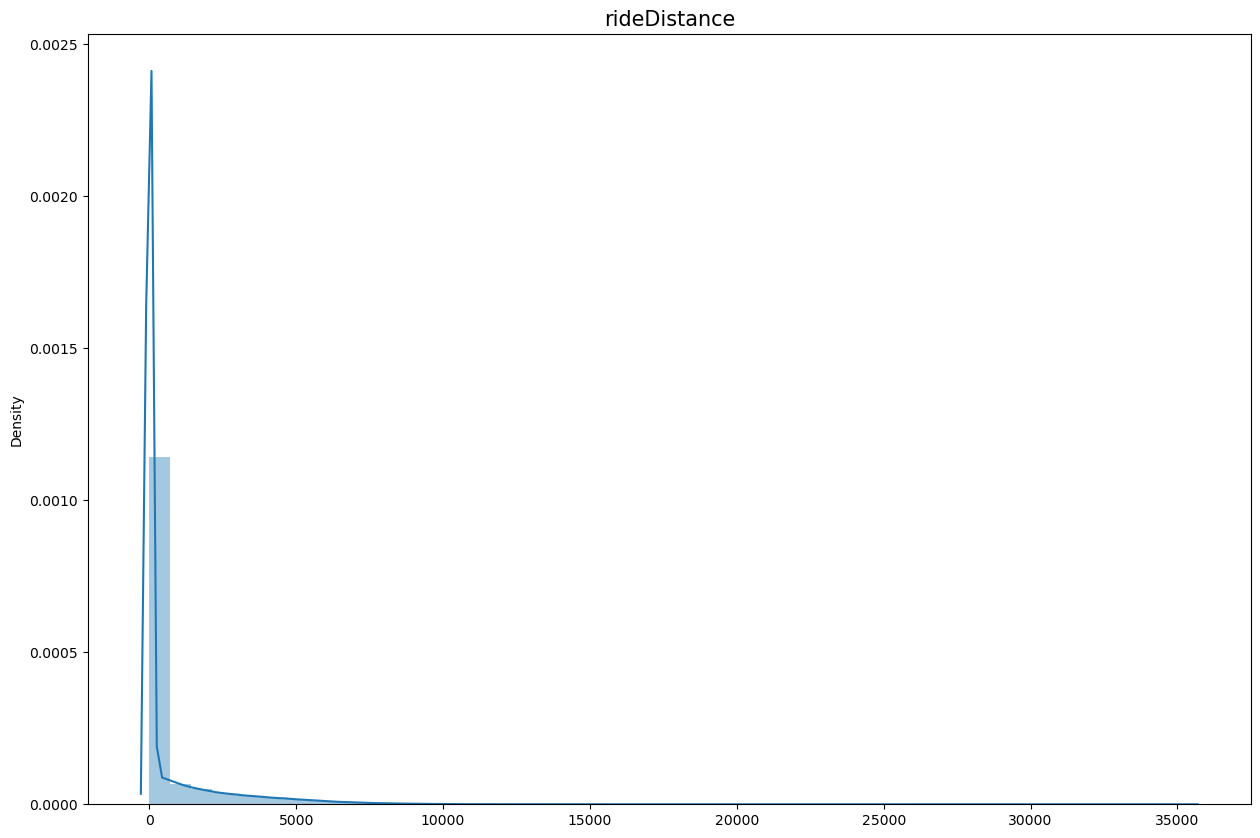

In [20]:
y.loc[y['rideDistance'] < y['rideDistance'].quantile(0.99)] 
plt.figure(figsize=(15,10))
sns.distplot(x=y['rideDistance'])
plt.title("rideDistance",fontsize=15)
plt.show()

In [21]:
k=y.loc[(y['winPlacePerc']==1) & (y['rideDistance']==0)]
l=y.loc[(y['winPlacePerc']==1) & (y['rideDistance']==0) & (y['kills']==0)]
print('number of players win with 0 walk distance:',len(k))
print('number of players win with 0 walk and  kills:',len(l))

number of players win with 0 walk distance: 12434
number of players win with 0 walk and  kills: 1793


In [22]:
per_r=len(g)/len(y)*100
per_r
print(f"the percentage is 0 ride: {per_r:.2f}%")
per_e=len(l)/len(pubg_data)*100
per_e
print(f"the percentage is 0 ride and kill : {per_e:.2f}%")

the percentage is 0 ride: 0.38%
the percentage is 0 ride and kill : 0.20%


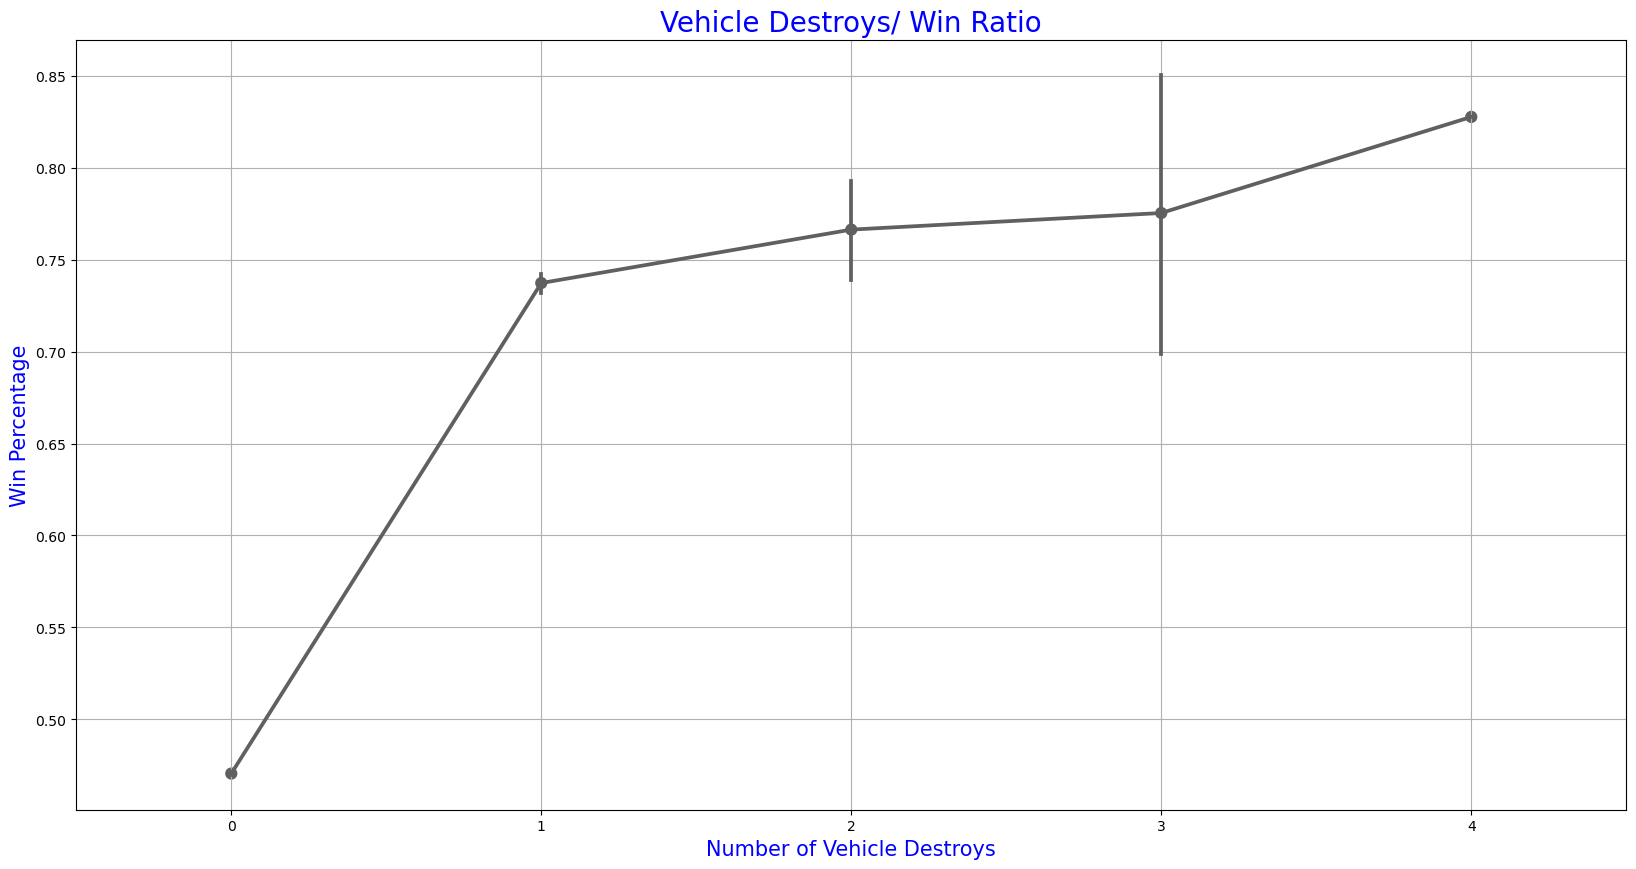

In [23]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=y,color='#606060')
plt.xlabel('Number of Vehicle Destroys',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Vehicle Destroys/ Win Ratio',fontsize = 20,color='blue')
plt.grid()
plt.show()

# Insights:

As the win% increases with the no. of vehicle destroys this means the player is a pro player.

## Swim Distance

In [24]:
print("the average swim taken {:.4f} m by players\n99% of people walked for {} m or less\nwhereas marathoner for {} m.".format(y['swimDistance'].mean(),y['swimDistance'].quantile(0.99),y['swimDistance'].max()))


the average swim taken 4.4908 m by players
99% of people walked for 123.0 m or less
whereas marathoner for 3823.0 m.


In [25]:
print("{} players ({:.4f}%) swimed 0 meters.\n This means that they dont want\to swim or condition may have not arise(more possible).".format(len(y[y['swimDistance'] == 0]), 100*len(y[y['swimDistance']==0])/len(y)))


831610 players (93.5031%) swimed 0 meters.
 This means that they dont want	o swim or condition may have not arise(more possible).


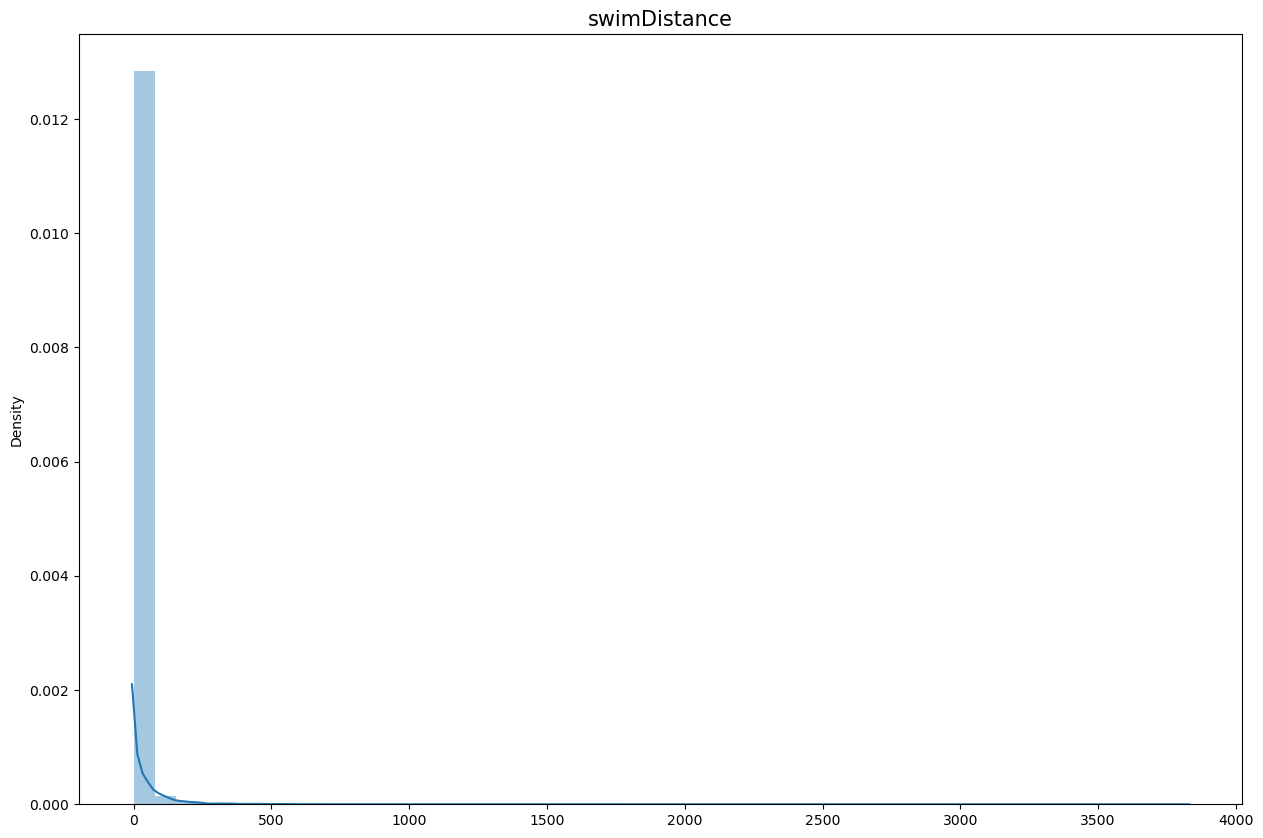

In [26]:
y.loc[y['swimDistance'] < y['swimDistance'].quantile(0.99)] 
plt.figure(figsize=(15,10))
sns.distplot(x=y['swimDistance'])
plt.title("swimDistance",fontsize=15)
plt.show()

In [27]:
s=y.loc[(y['winPlacePerc']==1) & (y['swimDistance']==0)]
m=y.loc[(y['winPlacePerc']==1) & (y['swimDistance']==0) & (y['kills']>=0)]
print('number of players win with 0 swim  distance:',len(s))
print('number of players win with 0 swim and  kills:',len(m))

number of players win with 0 swim  distance: 21627
number of players win with 0 swim and  kills: 21627


# Healers

In [28]:
print("The average heals taken {:.4f}  by players\n99% of people walked for {}  or less\nwhereas marathoner for {} .".format(y['heals'].mean(),y['heals'].quantile(0.99),y['heals'].max()))

print("The average boosts taken {:.4f}  by players\n99% of people walked for {}  or less\nwhereas marathoner for {} .".format(y['boosts'].mean(),y['boosts'].quantile(0.99),y['boosts'].max()))


The average heals taken 1.3674  by players
99% of people walked for 12.0  or less
whereas marathoner for 63 .
The average boosts taken 1.1049  by players
99% of people walked for 7.0  or less
whereas marathoner for 33 .


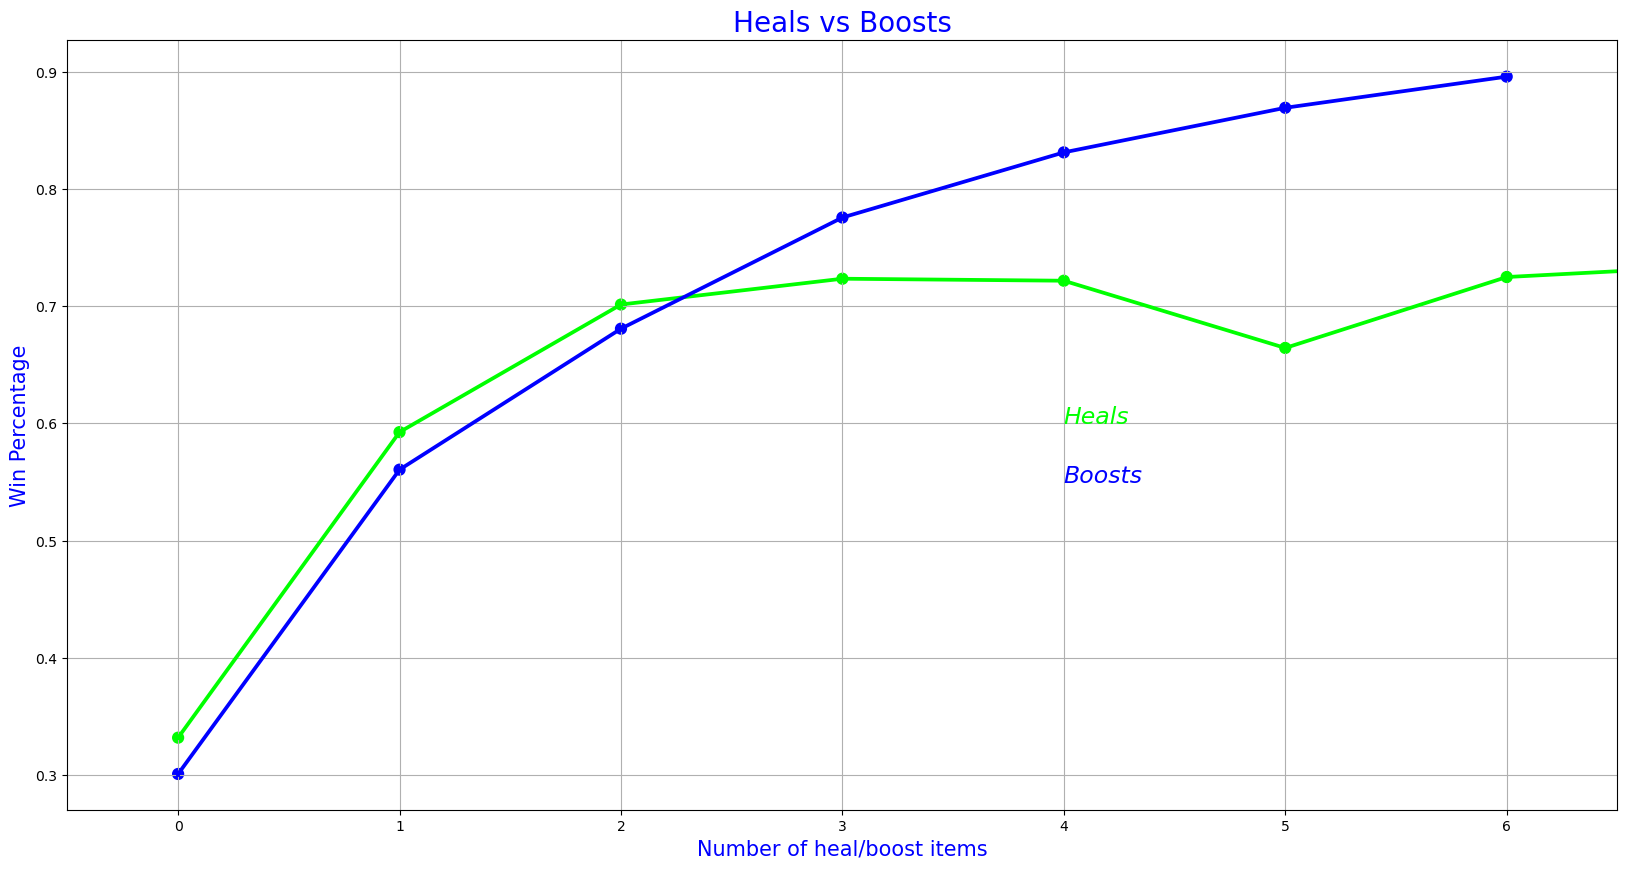

In [29]:
y = y[y['heals'] < y['heals'].quantile(0.99)]
y = y[y['boosts'] < y['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=y,color='lime')
sns.pointplot(x='boosts',y='winPlacePerc',data=y,color='blue')
plt.text(4,0.6,'Heals',color='lime',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals vs Boosts',fontsize = 20,color='blue')
plt.grid()
plt.show()

#  Matchtype

In [30]:
solos = y[y['numGroups']>50]
duos = y[(y['numGroups']>25) & (y['numGroups']<=50)]
squads = y[y['numGroups']<=25]
# in three gamming modes one can play solo alone,duo and squad with friends.100 players joins the server.
# for duo max teams = 50
#for squad max teams = 25

In [31]:
print("There are {} ({:.2f}%) solo games,\n {} ({:.2f}%) duo games and\n {} ({:.2f}%) squad games.".format(len(solos), 100*len(solos)/len(y), len(duos), 100*len(duos)/len(y), len(squads), 100*len(squads)/len(y),))


There are 137636 (15.91%) solo games,
 641738 (74.17%) duo games and
 85896 (9.93%) squad games.


In [33]:
match=y.loc[:,"matchType"].value_counts().to_frame().reset_index()
match.columns=["Type","Count"]
match

Type   Count
0          squad-fpp  341861
1            duo-fpp  194751
2              squad  121206
3           solo-fpp  104056
4                duo   61158
5               solo   35508
6   normal-squad-fpp    3219
7           crashfpp    1226
8     normal-duo-fpp    1013
9           flaretpp     490
10   normal-solo-fpp     335
11          flarefpp     155
12      normal-squad     107
13          crashtpp      82
14       normal-solo      69
15        normal-duo      34

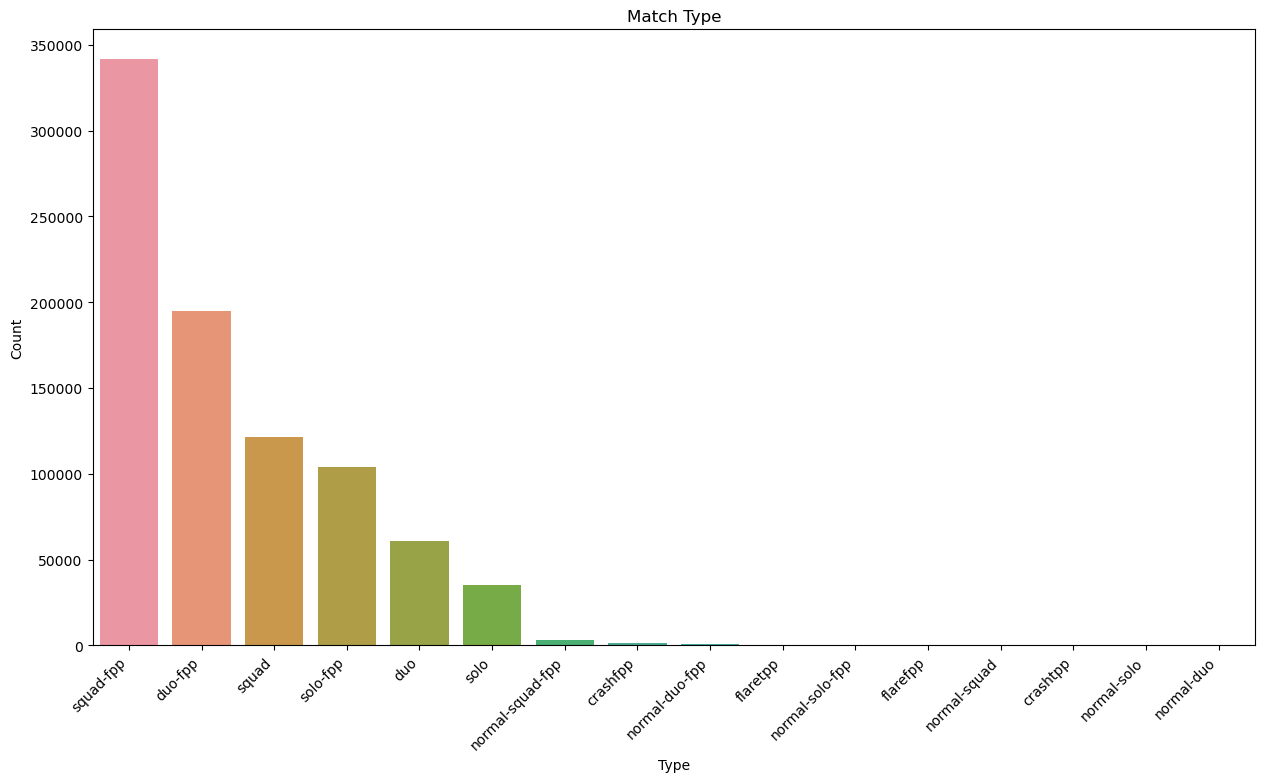

In [34]:
plt.figure(figsize=(15,8)) 
ticks=match.Type.values
ax=sns.barplot(x="Type",y="Count",data=match) 
ax.set_title("Match Type") 
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

In [35]:
y.loc[(y['walkDistance'] == 0) & (y['winPlacePerc'] == 1)] # these all player were hackers as their walkdistance will be o and 
# they have won the match which is not possible so we have to drop those players.


Id         groupId         matchId  assists  boosts  \
1985728  f19501be2d7890  e2c3fcc042c844  cfd78a55ab6674        0       0   
1738415  762fa2c3df8ce9  a1511611f8c528  2e225c67829dbe        0       0   
1261678  cb0106f1d77fbe  ad0e7c2dfc4935  a397d79ddb057c        2       0   
4073634  2b0823b3516f88  fa9c7ad4560122  6d8f24de5d78fa        0       0   
3725880  d6ef9caf3f027f  93b2d7acffca51  c88e3f37f69211        0       0   
...                 ...             ...             ...      ...     ...   
1941107  fb5198bddfb098  319c78d6142460  effebcb694756b        0       0   
3324606  4c28e7674a4cc2  cb815fbfeb443e  beb7f31f79ab33        0       0   
88035    316957fde25936  cad362c8f8d2ab  6b40410be908eb        0       0   
3203076  1575c6b9c01185  2aa9d520180be4  bbc1ba53f505b4        0       0   
1113224  e9be42a8516097  7700641178014d  888809ad630327        0       0   

         damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
1985728         0.00      0              0      0          2  ...        0   
1738415        47.04      0              0      0          1  ...        0   
1261678       414.30      6              1      5          9  ...        1   
4073634        46.80      0              0      0          1  ...        0   
3725880         0.00      0              0      0          2  ...        0   
...              ...    ...            ...    ...        ...  ...      ...   
1941107       158.80      0              0      0          1  ...        0   
3324606        99.00      0              0      1          2  ...        0   
88035           0.00      0              0      0          2  ...        0   
3203076       486.80      0              0      0          1  ...        0   
1113224       211.50      0              0      0          1  ...        0   

         rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
1985728           0.0          0           0.0          0               0   
1738415           0.0          0           0.0          0               0   
1261678           0.0          0           0.0          0               0   
4073634           0.0          0           0.0          0               0   
3725880           0.0          0           0.0          0               0   
...               ...        ...           ...        ...             ...   
1941107           0.0          0           0.0          0               0   
3324606           0.0          0           0.0          0               0   
88035             0.0          0           0.0          0               0   
3203076           0.0          0           0.0          0               0   
1113224           0.0          0           0.0          0               0   

         walkDistance  weaponsAcquired  winPoints  winPlacePerc  
1985728           0.0                7          0           1.0  
1738415           0.0                5          0           1.0  
1261678           0.0                8          0           1.0  
4073634           0.0                0          0           1.0  
3725880           0.0                1          0           1.0  
...               ...              ...        ...           ...  
1941107           0.0                3          0           1.0  
3324606           0.0                5          0           1.0  
88035             0.0                0          0           1.0  
3203076           0.0                4          0           1.0  
1113224           0.0               10          0           1.0  

[204 rows x 29 columns]

In [36]:
y = y.drop(y[(y['walkDistance'] == 0) & (y['winPlacePerc'] == 1)].index)


In [37]:
y['team'] = [1 if i>50 else 2 if (i>25 & i<=50) else 4 for i in y['numGroups']]


In [38]:
pubg_data=y

# Insights

while working on the dataset having (4446966, 29) rows and columns it is difficult to load the data everytime.

So we came to the conclusion to divide the data into chunks like : ( 20%, 30%, 40%) .

After dividing the data we got the same result for eah chunks so we have decided to work woth (20%) of the dataset.

In [39]:
pubg_data.info

<bound method DataFrame.info of                      Id         groupId         matchId  assists  boosts  \
4289863  ab772932dc284b  6f0931849c42fc  7558d7990b8795        0       0   
3353859  f6e963587e1e61  f2724371458701  55d030157d6eb8        0       3   
1660760  eae2ba6cc7de4c  a8ddca0c7e8f74  0cf8e1dc70559e        0       2   
2555773  36d45a7e95b913  916c4c31723cdb  7b572f22974581        0       0   
363725   aa5867db86503b  76d57fc80f70f2  fc69844a437eae        3       2   
...                 ...             ...             ...      ...     ...   
3478232  6fcda6b683cfb4  21abc78ee37901  63198bc30b9172        0       2   
3707983  3a6d9db33f38db  13db87cb61901a  eed54ad40013d9        0       0   
2620018  005168a16322cd  25a2015659d1b9  23b715f1e1c10b        2       4   
784872   f83c1dbd545109  766dcce1a5eab6  5858388b13237d        0       0   
521047   b8aea882e4a709  3c6f5a589a1964  59c9268f17936a        0       0   

         damageDealt  DBNOs  headshotKills  heals  kill

In [40]:
pubg_data.describe

<bound method NDFrame.describe of                      Id         groupId         matchId  assists  boosts  \
4289863  ab772932dc284b  6f0931849c42fc  7558d7990b8795        0       0   
3353859  f6e963587e1e61  f2724371458701  55d030157d6eb8        0       3   
1660760  eae2ba6cc7de4c  a8ddca0c7e8f74  0cf8e1dc70559e        0       2   
2555773  36d45a7e95b913  916c4c31723cdb  7b572f22974581        0       0   
363725   aa5867db86503b  76d57fc80f70f2  fc69844a437eae        3       2   
...                 ...             ...             ...      ...     ...   
3478232  6fcda6b683cfb4  21abc78ee37901  63198bc30b9172        0       2   
3707983  3a6d9db33f38db  13db87cb61901a  eed54ad40013d9        0       0   
2620018  005168a16322cd  25a2015659d1b9  23b715f1e1c10b        2       4   
784872   f83c1dbd545109  766dcce1a5eab6  5858388b13237d        0       0   
521047   b8aea882e4a709  3c6f5a589a1964  59c9268f17936a        0       0   

         damageDealt  DBNOs  headshotKills  heals  ki

In [41]:
pubg_data.head()

Id         groupId         matchId  assists  boosts  \
4289863  ab772932dc284b  6f0931849c42fc  7558d7990b8795        0       0   
3353859  f6e963587e1e61  f2724371458701  55d030157d6eb8        0       3   
1660760  eae2ba6cc7de4c  a8ddca0c7e8f74  0cf8e1dc70559e        0       2   
2555773  36d45a7e95b913  916c4c31723cdb  7b572f22974581        0       0   
363725   aa5867db86503b  76d57fc80f70f2  fc69844a437eae        3       2   

         damageDealt  DBNOs  headshotKills  heals  killPlace  ...  \
4289863        161.3      3              2      0          7  ...   
3353859        191.5      1              1      4          7  ...   
1660760        100.0      0              0      1         24  ...   
2555773          0.0      0              0      0         86  ...   
363725         289.9      2              0      9         14  ...   

         rideDistance  roadKills  swimDistance  teamKills  vehicleDestroys  \
4289863           0.0          0           0.0          0                0   
3353859        1580.0          1           0.0          0                0   
1660760         450.7          0           0.0          0                0   
2555773           0.0          0           0.0          0                0   
363725         3950.0          0           0.0          0                0   

        walkDistance  weaponsAcquired  winPoints  winPlacePerc  team  
4289863        565.3                2       1660        0.3929     2  
3353859        532.6                3          0        0.6923     2  
1660760       1607.0                6       1593        0.7083     1  
2555773        134.6                1          0        0.1154     4  
363725        2131.0                5          0        0.8148     2  

[5 rows x 30 columns]

In [42]:
pubg_data.tail()

Id         groupId         matchId  assists  boosts  \
3478232  6fcda6b683cfb4  21abc78ee37901  63198bc30b9172        0       2   
3707983  3a6d9db33f38db  13db87cb61901a  eed54ad40013d9        0       0   
2620018  005168a16322cd  25a2015659d1b9  23b715f1e1c10b        2       4   
784872   f83c1dbd545109  766dcce1a5eab6  5858388b13237d        0       0   
521047   b8aea882e4a709  3c6f5a589a1964  59c9268f17936a        0       0   

         damageDealt  DBNOs  headshotKills  heals  killPlace  ...  \
3478232       233.10      2              0      0         21  ...   
3707983        95.55      0              0      0         92  ...   
2620018       686.00      4              1      2          3  ...   
784872        100.00      1              0      0         98  ...   
521047          0.00      0              0      1         68  ...   

         rideDistance  roadKills  swimDistance  teamKills  vehicleDestroys  \
3478232           0.0          0           0.0          0                0   
3707983           0.0          0           0.0          0                0   
2620018           0.0          0           0.0          0                0   
784872            0.0          0           0.0          0                0   
521047            0.0          0           0.0          0                0   

        walkDistance  weaponsAcquired  winPoints  winPlacePerc  team  
3478232       257.70                2       1435        0.4583     2  
3707983        49.88                1          0        0.0208     2  
2620018      2840.00                3          0        1.0000     2  
784872         23.07                1          0        0.0000     2  
521047       1053.00                4          0        0.3958     2  

[5 rows x 30 columns]

In [43]:
pubg_data.shape

(865066, 30)

In [44]:
pubg_data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'team'],
      dtype='object')

# Insights: To get the value counts for each columns

In [45]:
pubg_data.matchType.value_counts()

squad-fpp           341859
duo-fpp             194751
squad               121205
solo-fpp            104056
duo                  61158
solo                 35353
normal-squad-fpp      3188
crashfpp              1226
normal-duo-fpp        1007
flaretpp               490
normal-solo-fpp        331
flarefpp               155
normal-squad           103
crashtpp                82
normal-solo             68
normal-duo              34
Name: matchType, dtype: int64

In [46]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'matchType' is a categorical column in your DataFrame
encoder = LabelEncoder()

# Fit and transform the 'matchType' column to obtain label-encoded values
pubg_data['matchType_encoded'] = encoder.fit_transform(pubg_data['matchType'])

# Display the result
print(pubg_data[['matchType', 'matchType_encoded']])

         matchType  matchType_encoded
4289863  squad-fpp                 15
3353859   crashfpp                  0
1660760   solo-fpp                 13
2555773      squad                 14
363725   squad-fpp                 15
...            ...                ...
3478232    duo-fpp                  3
3707983    duo-fpp                  3
2620018        duo                  2
784872         duo                  2
521047     duo-fpp                  3

[865066 rows x 2 columns]


In [47]:
pubg_data.matchType_encoded.value_counts()

15    341859
3     194751
14    121205
13    104056
2      61158
12     35353
11      3188
0       1226
7       1007
5        490
9        331
4        155
10       103
1         82
8         68
6         34
Name: matchType_encoded, dtype: int64

In [48]:
 pubg_data.drop(columns=['matchType'], inplace=True) # dropping the same column 'matchtype'

In [49]:
pubg_data['matchType_encoded']=pubg_data['matchType_encoded'].astype('int64')

In [50]:
pubg_data.assists.value_counts()

0     719948
1     111919
2      24611
3       6144
4       1686
5        438
6        178
7         76
8         32
9         16
10         7
12         6
11         4
13         1
Name: assists, dtype: int64

In [51]:
pubg_data.boosts.value_counts()

0    503665
1    135316
2     96533
3     57109
4     37157
5     22464
6     12822
Name: boosts, dtype: int64

In [52]:
pubg_data.damageDealt.value_counts()

0.000       246296
100.000      51806
200.000      12237
300.000       2695
75.000        2642
             ...  
2149.000         1
1.024            1
4.926            1
917.600          1
6.807            1
Name: damageDealt, Length: 22433, dtype: int64

In [53]:
pubg_data.DBNOs.value_counts()

0     545824
1     191923
2      75062
3      29879
4      12164
5       5440
6       2375
7       1136
8        499
9        262
10       166
11        95
12        66
13        47
14        34
15        20
18        16
17        14
16        12
22         5
20         5
23         5
19         5
25         4
21         3
28         2
26         1
33         1
39         1
Name: DBNOs, dtype: int64

In [54]:
pubg_data.headshotKills.value_counts()

0     726264
1     108556
2      22253
3       5477
4       1541
5        520
6        207
7         98
8         58
9         36
11        13
10        11
13         9
12         9
20         3
14         2
18         2
23         2
16         2
15         1
21         1
19         1
Name: headshotKills, dtype: int64

In [55]:
pubg_data.heals.value_counts()

0     529055
1     133613
2      62070
3      38417
4      26673
5      25527
6      16572
7      11861
8       7705
9       5467
10      4610
11      3496
Name: heals, dtype: int64

In [56]:
pubg_data.killPoints.value_counts()

0       516064
1000     26983
1237       691
1274       681
1031       678
         ...  
571          1
547          1
233          1
253          1
292          1
Name: killPoints, Length: 1434, dtype: int64

In [57]:
pubg_data.kills.value_counts()

0     501924
1     181638
2      90164
3      43133
4      22396
5      11534
6       6342
7       3283
8       1839
9       1035
10       618
11       385
12       225
13       175
14        92
15        75
16        52
17        38
18        31
20        18
19        11
21        10
22         8
25         7
23         5
27         4
24         4
31         4
37         3
28         3
26         2
29         2
55         1
45         1
36         1
41         1
33         1
38         1
Name: kills, dtype: int64

In [58]:
pubg_data.revives.value_counts()

0     755739
1      88588
2      17100
3       2942
4        534
5        109
6         21
7         11
8          6
10         3
12         3
11         2
9          2
15         1
16         1
19         1
23         1
18         1
20         1
Name: revives, dtype: int64

In [59]:
pubg_data.roadKills.value_counts()

0     862670
1       2070
2        229
3         65
4         18
5          6
6          3
8          2
9          1
7          1
10         1
Name: roadKills, dtype: int64

In [60]:
pubg_data.teamKills.value_counts()

0    846402
1     17076
2      1424
3       153
4        11
Name: teamKills, dtype: int64

In [61]:
pubg_data.vehicleDestroys.value_counts()

0    858999
1      5837
2       208
3        21
4         1
Name: vehicleDestroys, dtype: int64

In [62]:
pubg_data.winPlacePerc.value_counts()

0.0000    44158
1.0000    21137
0.5000    10870
0.3333     8543
0.6667     7456
          ...  
0.6709        1
0.9077        1
0.2833        1
0.1321        1
0.3733        1
Name: winPlacePerc, Length: 2473, dtype: int64

In [63]:
pubg_data.info()  # to get datatype of all the features

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865066 entries, 4289863 to 521047
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Id                 865066 non-null  object 
 1   groupId            865066 non-null  object 
 2   matchId            865066 non-null  object 
 3   assists            865066 non-null  int64  
 4   boosts             865066 non-null  int64  
 5   damageDealt        865066 non-null  float64
 6   DBNOs              865066 non-null  int64  
 7   headshotKills      865066 non-null  int64  
 8   heals              865066 non-null  int64  
 9   killPlace          865066 non-null  int64  
 10  killPoints         865066 non-null  int64  
 11  kills              865066 non-null  int64  
 12  killStreaks        865066 non-null  int64  
 13  longestKill        865066 non-null  float64
 14  matchDuration      865066 non-null  int64  
 15  maxPlace           865066 non-null  int64  
 

# Insights:

This information is crucial for understanding the structure and characteristics of the dataset, which is essential for data preprocessing, analysis, and modeling tasks. 

In [64]:
pubg=pubg_data

In [65]:
pubg.describe()

assists         boosts    damageDealt          DBNOs  \
count  865066.000000  865066.000000  865066.000000  865066.000000   
mean        0.220453       0.968237     123.586177       0.627040   
std         0.566110       1.459278     159.229125       1.092475   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000      80.520000       0.000000   
75%         0.000000       2.000000     177.500000       1.000000   
max        13.000000       6.000000    5557.000000      39.000000   

       headshotKills          heals      killPlace     killPoints  \
count  865066.000000  865066.000000  865066.000000  865066.000000   
mean        0.210051       1.138860      48.507505     504.825635   
std         0.564394       2.059257      27.207984     626.391171   
min         0.000000       0.000000       1.000000       0.000000   
25%         0.000000       0.000000      25.000000       0.000000   
50%         0.000000       0.000000      49.000000       0.000000   
75%         0.000000       1.000000      72.000000    1170.000000   
max        23.000000      11.000000     100.000000    2170.000000   

               kills    killStreaks  ...      roadKills   swimDistance  \
count  865066.000000  865066.000000  ...  865066.000000  865066.000000   
mean        0.861950       0.525771  ...       0.003335       4.292606   
std         1.450628       0.700593  ...       0.071846      29.879651   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       0.000000  ...       0.000000       0.000000   
50%         0.000000       0.000000  ...       0.000000       0.000000   
75%         1.000000       1.000000  ...       0.000000       0.000000   
max        55.000000      13.000000  ...      10.000000    3823.000000   

           teamKills  vehicleDestroys   walkDistance  weaponsAcquired  \
count  865066.000000    865066.000000  865066.000000    865066.000000   
mean        0.023613         0.007306    1107.832420         3.601150   
std         0.166017         0.088842    1155.911853         2.431396   
min         0.000000         0.000000       0.000000         0.000000   
25%         0.000000         0.000000     148.200000         2.000000   
50%         0.000000         0.000000     631.700000         3.000000   
75%         0.000000         0.000000    1885.000000         5.000000   
max         4.000000         4.000000   15370.000000       153.000000   

           winPoints   winPlacePerc           team  matchType_encoded  
count  865066.000000  865066.000000  865066.000000      865066.000000  
mean      607.117850       0.461382       2.000613          10.818035  
std       739.523708       0.303297       0.691765           5.332886  
min         0.000000       0.000000       1.000000           0.000000  
25%         0.000000       0.192300       2.000000           3.000000  
50%         0.000000       0.444400       2.000000          14.000000  
75%      1495.000000       0.723400       2.000000          15.000000  
max      2013.000000       1.000000       4.000000          15.000000  

[8 rows x 27 columns]

In [66]:
# to find uniques values for each columns
pubg.nunique() #  if the numer of unique values are < 25 then the variable is likely to be a category otherwise continuous

Id                   865066
groupId              709790
matchId               47922
assists                  14
boosts                    7
damageDealt           22433
DBNOs                    29
headshotKills            22
heals                    12
killPlace               100
killPoints             1434
kills                    38
killStreaks              14
longestKill           23641
matchDuration          1261
maxPlace                 99
numGroups               100
rankPoints             1600
revives                  19
rideDistance          23177
roadKills                11
swimDistance          18754
teamKills                 5
vehicleDestroys           5
walkDistance          31407
weaponsAcquired          71
winPoints              1083
winPlacePerc           2473
team                      3
matchType_encoded        16
dtype: int64

# Correlation matrix:

By analyzing the correlation matrix, we can identify relationships between variables. Positive values indicate positive correlations while negative values indicate negative correlations. Values closer to 1 or -1 indicate stronger correlations. You can use this information to make decisions about which features to include in your analysis or model. High correlations can suggest redundancy or multicollinearity, while low correlations may indicate independence between variables.
​


In [67]:
pubg.corr()

assists    boosts  damageDealt     DBNOs  headshotKills  \
assists            1.000000  0.292050     0.393858  0.285830       0.188925   
boosts             0.292050  1.000000     0.487394  0.338984       0.304043   
damageDealt        0.393858  0.487394     1.000000  0.737359       0.594625   
DBNOs              0.285830  0.338984     0.737359  1.000000       0.463998   
headshotKills      0.188925  0.304043     0.594625  0.463998       1.000000   
heals              0.229062  0.556624     0.353443  0.272281       0.203326   
killPlace         -0.278495 -0.552779    -0.679496 -0.556684      -0.469157   
killPoints         0.038753  0.010142     0.051052  0.042083       0.024054   
kills              0.304565  0.465569     0.878096  0.709679       0.660732   
killStreaks        0.230715  0.392862     0.706727  0.646200       0.513628   
longestKill        0.248593  0.401782     0.550136  0.442085       0.436205   
matchDuration     -0.032042  0.049755    -0.024293 -0.026368      -0.029773   
maxPlace          -0.146597 -0.028910    -0.048868 -0.267974       0.001866   
numGroups         -0.145550 -0.027970    -0.048203 -0.266111       0.001982   
rankPoints        -0.018063  0.018232    -0.004543 -0.004606       0.003286   
revives            0.187540  0.249557     0.251604  0.289274       0.147154   
rideDistance       0.097005  0.315795     0.122320  0.086718       0.062175   
roadKills          0.011255  0.032191     0.048373  0.033388       0.007412   
swimDistance       0.020201  0.109560     0.034241  0.016565       0.027313   
teamKills          0.007181  0.017511     0.019932  0.075244       0.010441   
vehicleDestroys    0.051985  0.076689     0.075224  0.057230       0.035584   
walkDistance       0.279292  0.643487     0.381250  0.270215       0.237047   
weaponsAcquired    0.233948  0.408140     0.342319  0.209323       0.208131   
winPoints          0.024877 -0.004484     0.019623  0.011465       0.005854   
winPlacePerc       0.288810  0.636532     0.424525  0.265845       0.263971   
team               0.093700  0.021465     0.026558  0.173477      -0.005313   
matchType_encoded  0.034206  0.010342     0.001955  0.054405       0.002481   

                      heals  killPlace  killPoints     kills  killStreaks  \
assists            0.229062  -0.278495    0.038753  0.304565     0.230715   
boosts             0.556624  -0.552779    0.010142  0.465569     0.392862   
damageDealt        0.353443  -0.679496    0.051052  0.878096     0.706727   
DBNOs              0.272281  -0.556684    0.042083  0.709679     0.646200   
headshotKills      0.203326  -0.469157    0.024054  0.660732     0.513628   
heals              1.000000  -0.406957    0.001435  0.320705     0.284160   
killPlace         -0.406957   1.000000   -0.024635 -0.739645    -0.810127   
killPoints         0.001435  -0.024635    1.000000  0.036315     0.036851   
kills              0.320705  -0.739645    0.036315  1.000000     0.815196   
killStreaks        0.284160  -0.810127    0.036851  0.815196     1.000000   
longestKill        0.265873  -0.535814    0.015110  0.596538     0.512030   
matchDuration      0.086270   0.007441   -0.098992 -0.046523    -0.044926   
maxPlace          -0.076452   0.020739   -0.044905 -0.012128    -0.037224   
numGroups         -0.075778   0.022662   -0.042567 -0.011397    -0.036020   
rankPoints         0.014026  -0.011731   -0.975810  0.006083     0.002130   
revives            0.238769  -0.264999    0.013015  0.250229     0.235821   
rideDistance       0.274897  -0.223306   -0.027696  0.096891     0.083595   
roadKills          0.023552  -0.057118   -0.006054  0.060119     0.061735   
swimDistance       0.078549  -0.086841   -0.004884  0.036886     0.031519   
teamKills          0.032648  -0.040439   -0.039129  0.022286     0.030960   
vehicleDestroys    0.059600  -0.070233   -0.009170  0.074623     0.060363   
walkDistance       0.442149  -0.579051    0.005819  0.357294     0.311470   
weaponsAcquired    0.317168  -0.4833

In [68]:
correlation_matrix = pubg.corr()
print (pubg.corr())


                    assists    boosts  damageDealt     DBNOs  headshotKills  \
assists            1.000000  0.292050     0.393858  0.285830       0.188925   
boosts             0.292050  1.000000     0.487394  0.338984       0.304043   
damageDealt        0.393858  0.487394     1.000000  0.737359       0.594625   
DBNOs              0.285830  0.338984     0.737359  1.000000       0.463998   
headshotKills      0.188925  0.304043     0.594625  0.463998       1.000000   
heals              0.229062  0.556624     0.353443  0.272281       0.203326   
killPlace         -0.278495 -0.552779    -0.679496 -0.556684      -0.469157   
killPoints         0.038753  0.010142     0.051052  0.042083       0.024054   
kills              0.304565  0.465569     0.878096  0.709679       0.660732   
killStreaks        0.230715  0.392862     0.706727  0.646200       0.513628   
longestKill        0.248593  0.401782     0.550136  0.442085       0.436205   
matchDuration     -0.032042  0.049755    -0.024293 -

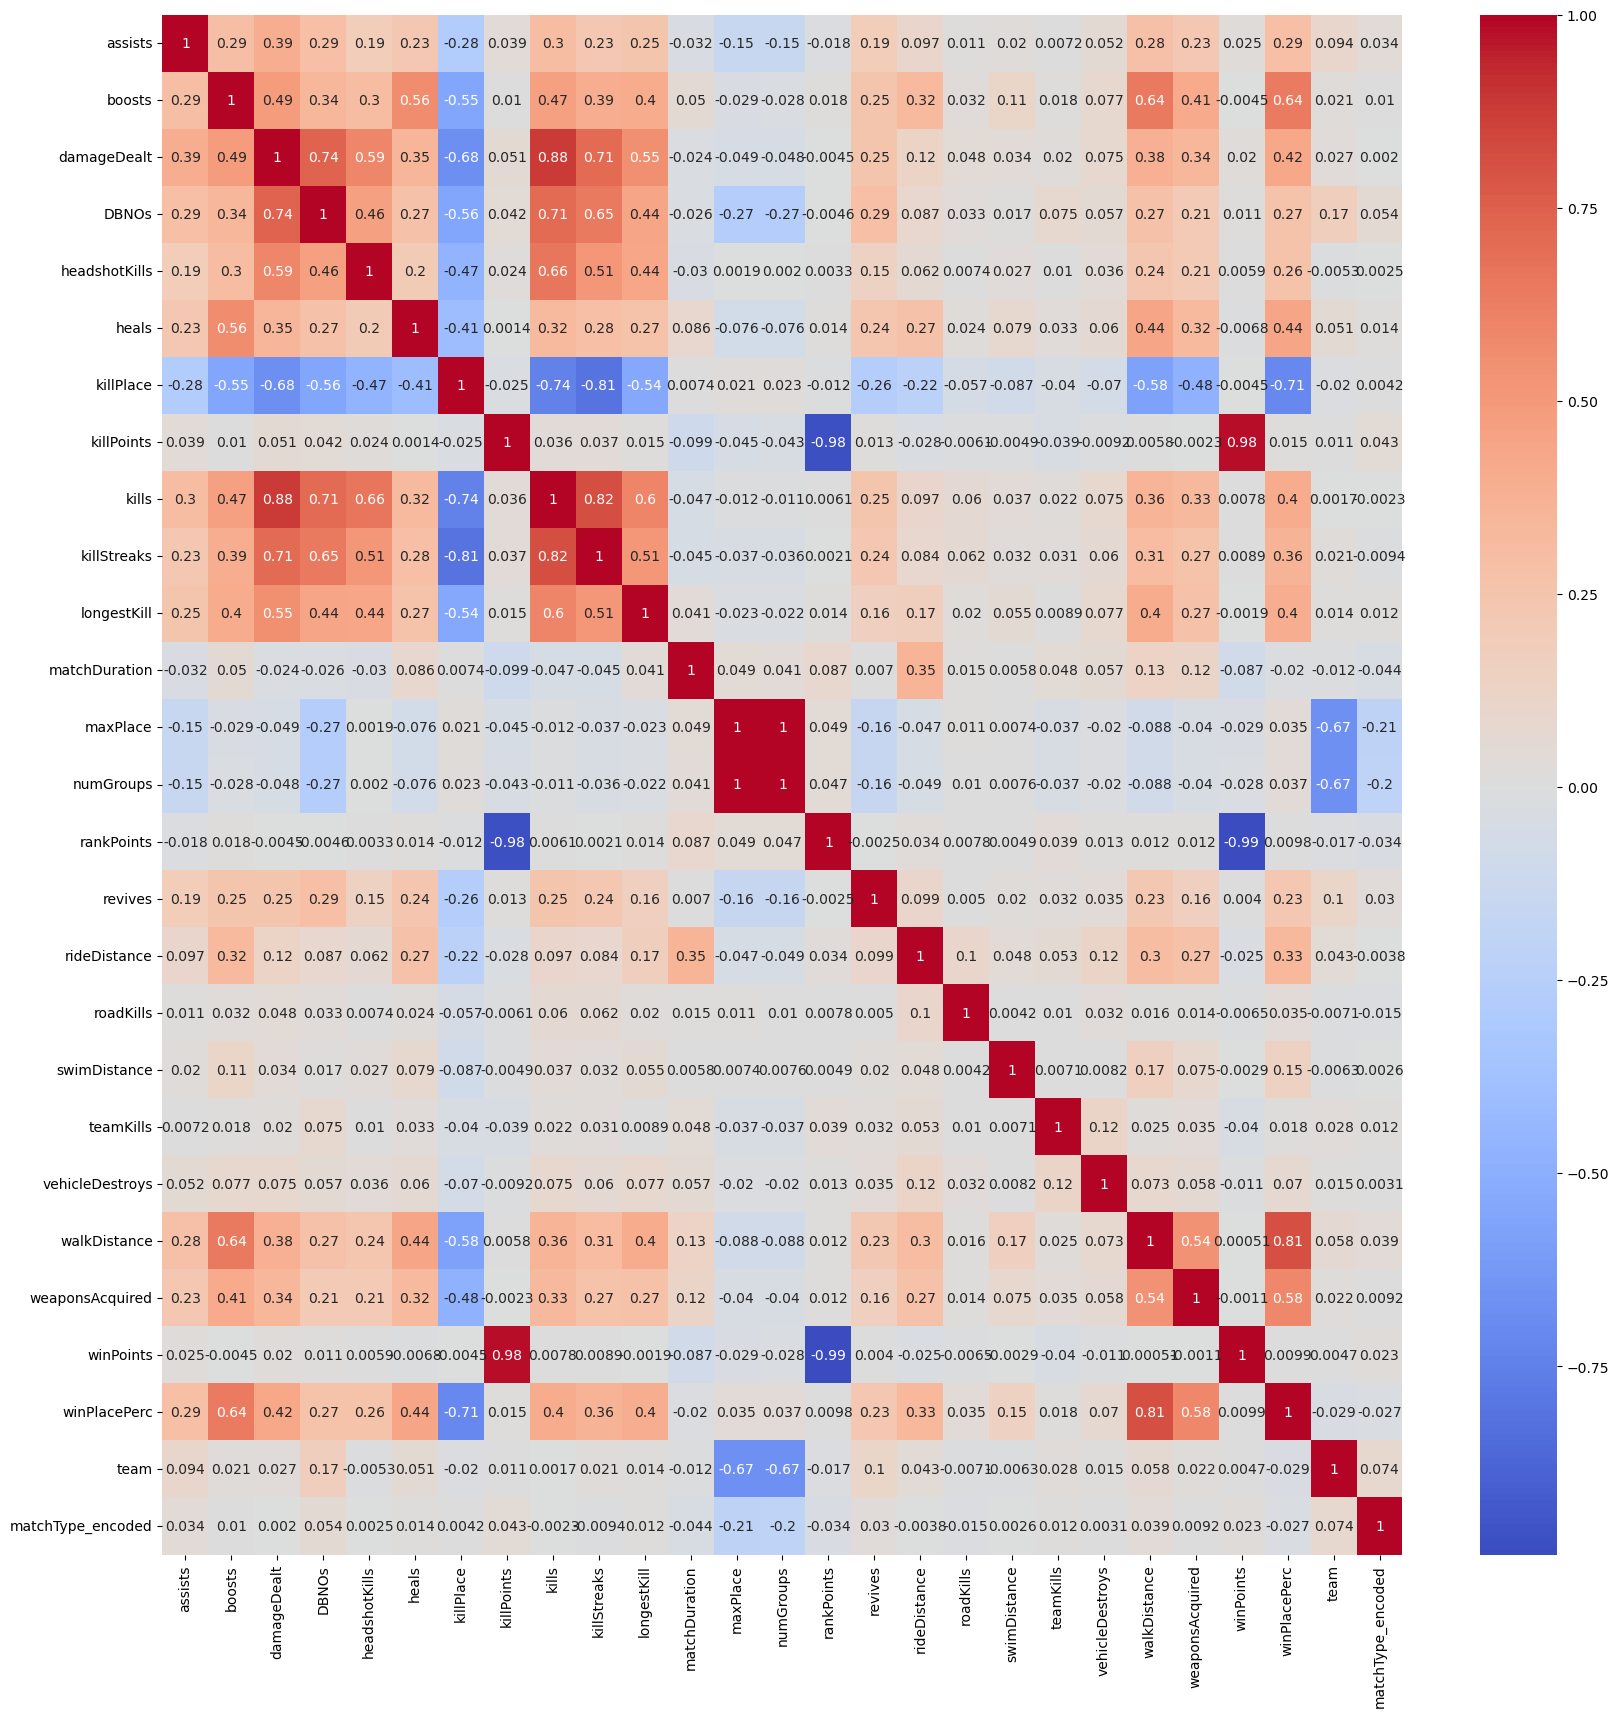

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(20, 20))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

In [70]:
# Correlation analysis with target column
correlation_matrix = pubg.corr()
correlations_with_target = correlation_matrix['winPlacePerc'].sort_values(ascending=False)
print(correlations_with_target)

winPlacePerc         1.000000
walkDistance         0.807674
boosts               0.636532
weaponsAcquired      0.580583
heals                0.443014
damageDealt          0.424525
kills                0.404006
longestKill          0.398397
killStreaks          0.362179
rideDistance         0.332858
assists              0.288810
DBNOs                0.265845
headshotKills        0.263971
revives              0.232880
swimDistance         0.148122
vehicleDestroys      0.070020
numGroups            0.037169
maxPlace             0.034590
roadKills            0.034577
teamKills            0.017660
killPoints           0.014556
winPoints            0.009888
rankPoints           0.009753
matchDuration       -0.020122
matchType_encoded   -0.026535
team                -0.029153
killPlace           -0.709452
Name: winPlacePerc, dtype: float64


# Insites:

 ## High Positive Correlations with Target (winPlacePerc):
• walkDistance (0.810937)

• boosts (0.633914)

• weaponsAcquired (0.584033)

These features have a strong positive correlation with the target variable, indicating that as these values increase, the winPlacePerc tends to increase as well. We would typically want to keep these features.

## Moderate Positive Correlations with Target:
• damageDealt (0.440353)

• heals (0.427825)

• kills (0.419997)

• longestKill (0.410307)

• killStreaks (0.377964)

These features also have positive correlations with the target variable, though they are somewhat less strong than the previous set. Depending on your specific modeling goals and the complexity of our model, you might choose to keep or drop some of these.

## Low Positive Correlations with Target:
• rideDistance (0.343465)

• assists (0.299651)

• DBNOs (0.280614)

• headshotKills (0.278268)

• revives (0.240807)

These features have relatively lower positive correlations with the target. Whether to keep or drop them depends on your specific modeling objectives and the importance of these features in our domain Knowledge.

## Low Correlations with Target:
• swimDistance (0.148706)

• vehicleDestroys (0.073771)

• numGroups (0.038874)

• maxPlace (0.036592)

• roadKills (0.035274)

• teamKills (0.016946)

• rankPoints (0.013407)

• killPoints (0.013287)

• winPoints (0.007225)

• matchDuration (-0.006093)

These features have very low correlations with the target variable. You might consider dropping these features as they are less likely to contribute significantly to predicting the target.

In [71]:
def correlation(pubg,threshold):
    col_corr=set()  # creating empty set
    corr_matrix = pubg.corr().abs()
    for i in range (len(corr_matrix.columns)): #abs for absolute error
        for j in range(i):
            if corr_matrix.iloc[i,j] > threshold:
                colname=corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
    return col_corr

In [72]:
corr_feature=correlation(pubg,0.85)
len(set(corr_feature))

4

In [73]:
corr_feature


{'kills', 'numGroups', 'rankPoints', 'winPoints'}

In [159]:
pubg.drop(['kills','numGroups','rankPoints','winPoints'],axis=1)


Id         groupId         matchId  assists  boosts  \
4289863  ab772932dc284b  6f0931849c42fc  7558d7990b8795      0.0     0.0   
3353859  f6e963587e1e61  f2724371458701  55d030157d6eb8      0.0     3.0   
1660760  eae2ba6cc7de4c  a8ddca0c7e8f74  0cf8e1dc70559e      0.0     2.0   
2555773  36d45a7e95b913  916c4c31723cdb  7b572f22974581      0.0     0.0   
363725   aa5867db86503b  76d57fc80f70f2  fc69844a437eae      0.0     2.0   
...                 ...             ...             ...      ...     ...   
3478232  6fcda6b683cfb4  21abc78ee37901  63198bc30b9172      0.0     2.0   
3707983  3a6d9db33f38db  13db87cb61901a  eed54ad40013d9      0.0     0.0   
2620018  005168a16322cd  25a2015659d1b9  23b715f1e1c10b      0.0     4.0   
784872   f83c1dbd545109  766dcce1a5eab6  5858388b13237d      0.0     0.0   
521047   b8aea882e4a709  3c6f5a589a1964  59c9268f17936a      0.0     0.0   

         damageDealt  DBNOs  headshotKills  heals  killPlace  ...  \
4289863       161.30    2.5            0.0    0.0        7.0  ...   
3353859       191.50    1.0            0.0    2.5        7.0  ...   
1660760       100.00    0.0            0.0    1.0       24.0  ...   
2555773         0.00    0.0            0.0    0.0       86.0  ...   
363725        289.90    2.0            0.0    2.5       14.0  ...   
...              ...    ...            ...    ...        ...  ...   
3478232       233.10    2.0            0.0    0.0       21.0  ...   
3707983        95.55    0.0            0.0    0.0       92.0  ...   
2620018       443.75    2.5            0.0    2.0        3.0  ...   
784872        100.00    1.0            0.0    0.0       98.0  ...   
521047          0.00    0.0            0.0    1.0       68.0  ...   

         rideDistance  roadKills  swimDistance  teamKills  vehicleDestroys  \
4289863           0.0        0.0           0.0        0.0              0.0   
3353859           0.0        0.0           0.0        0.0              0.0   
1660760           0.0        0.0           0.0        0.0              0.0   
2555773           0.0        0.0           0.0        0.0              0.0   
363725            0.0        0.0           0.0        0.0              0.0   
...               ...        ...           ...        ...              ...   
3478232           0.0        0.0           0.0        0.0              0.0   
3707983           0.0        0.0           0.0        0.0              0.0   
2620018           0.0        0.0           0.0        0.0              0.0   
784872            0.0        0.0           0.0        0.0              0.0   
521047            0.0        0.0           0.0        0.0              0.0   

         walkDistance  weaponsAcquired  winPlacePerc  team  matchType_encoded  
4289863        565.30              2.0        0.3929     2                 15  
3353859        532.60              3.0        0.6923     2                  0  
1660760       1607.00              6.0        0.7083     1                 13  
2555773        134.60              1.0        0.1154     4                 14  
363725        2131.00              5.0        0.8148     2                 15  
...               ...              ...           ...   ...                ...  
3478232        257.70              2.0        0.4583     2                  3  
3707983         49.88              1.0        0.0208     2                  3  
2620018       2840.00              3.0        1.0000     2                  2  
784872          23.07              1.0        0.0000     2                  2  
521047        1053.00              4.0        0.3958     2                  3  

[865066 rows x 26 columns]

# Insights:

When creating a predictive model to determine the win probability of a PUBG match, it's essential to identify the related columns or features that may significantly affect the win probability by detemining the correlation with the target column. 

The choice of  columns depends on our specific analysis and modeling approach. However, here are many columns that are likely to be related to the win probability in a PUBG match:

# EDA 

## Univariate Analysis

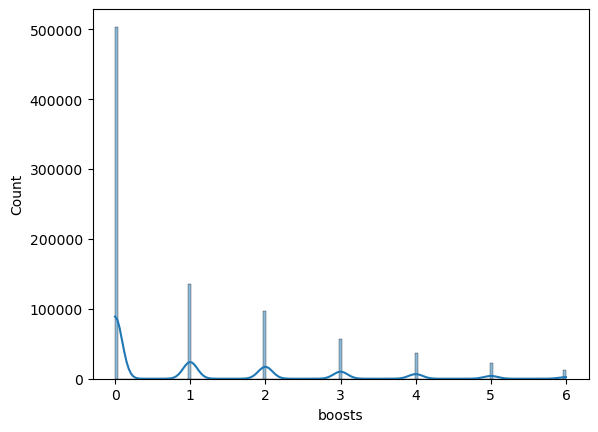

In [75]:
sns.histplot(x=pubg.boosts,kde=True)
plt.show()

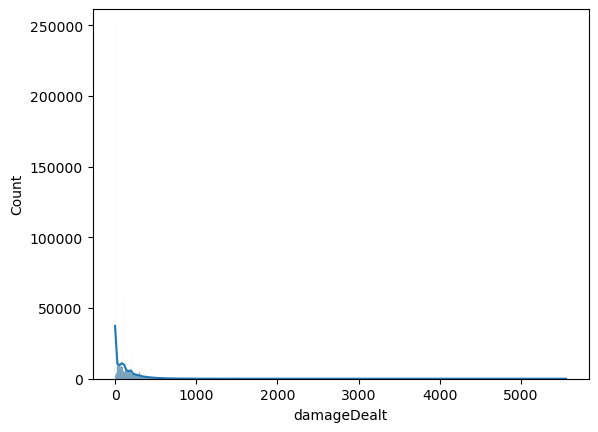

In [76]:
sns.histplot(x=pubg.damageDealt,kde=True)
plt.show()

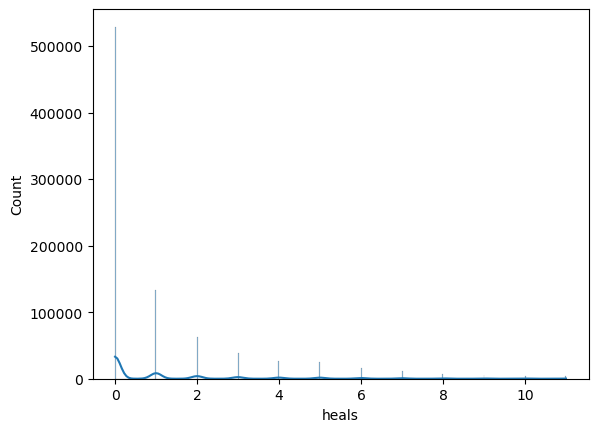

In [77]:
sns.histplot(x=pubg.heals,kde=True)
plt.show()

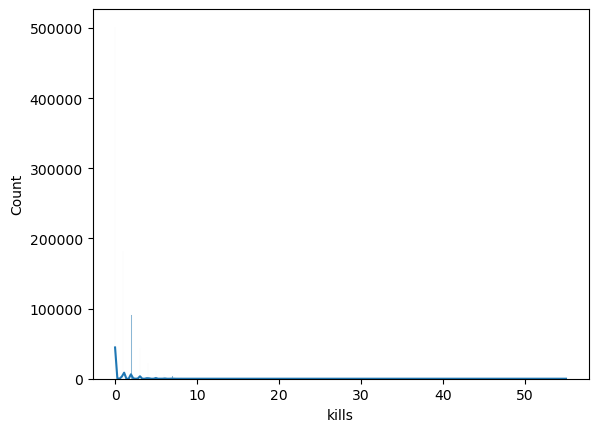

In [78]:
sns.histplot(x=pubg.kills,kde=True)
plt.show()

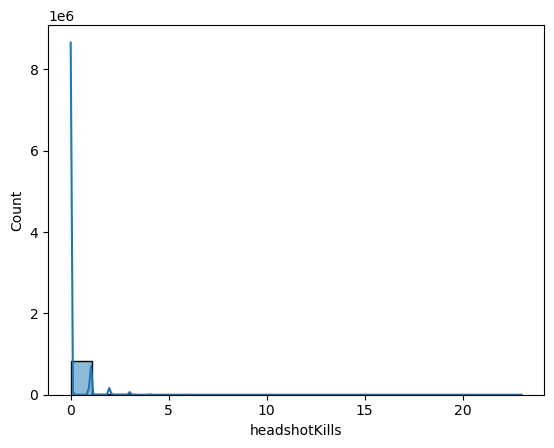

In [79]:
sns.histplot(x=pubg.headshotKills,kde=True)
plt.show()

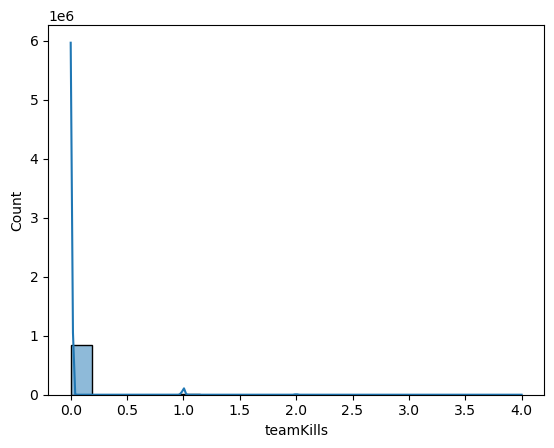

In [80]:
sns.histplot(x=pubg.teamKills,kde=True)
plt.show()

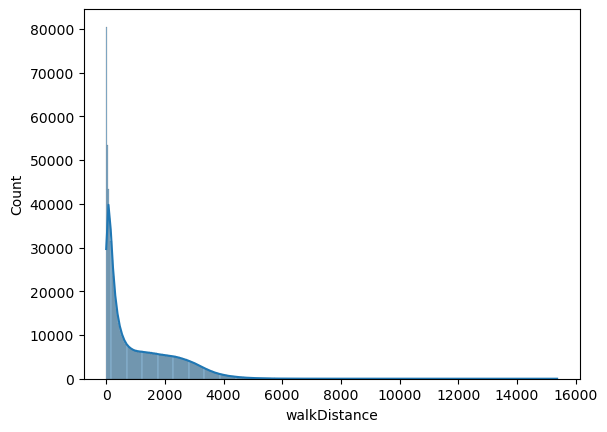

In [81]:
sns.histplot(x=pubg.walkDistance,kde=True)
plt.show()

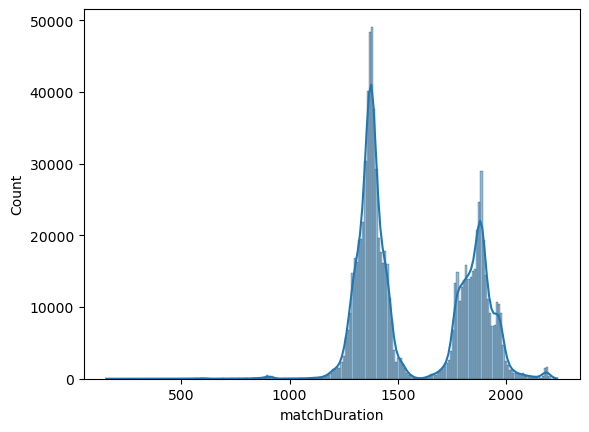

In [82]:
sns.histplot(x=pubg.matchDuration,kde=True)
plt.show()

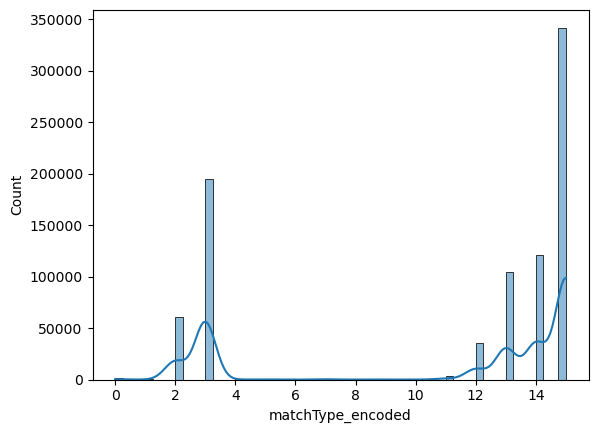

In [83]:
sns.histplot(x=pubg.matchType_encoded,kde=True)
plt.show()

 # Bivariate and Multivariate Analysis

In [84]:
pubg_cont = pubg[['assists', 'boosts', 'damageDealt', 'DBNOs',   # bivariate for continuous columns
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc']]

In [85]:
pubg_catg= pubg_data[['Id', 'groupId', 'matchId','matchType_encoded']] # bivariate for categorical columns

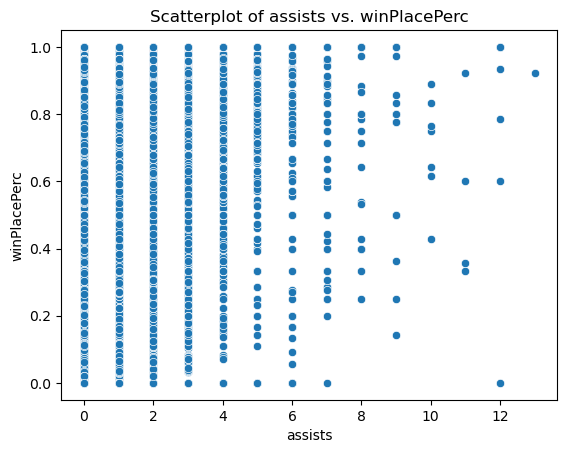

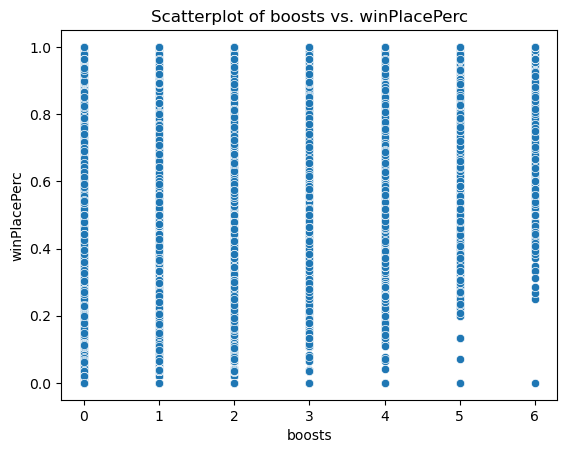

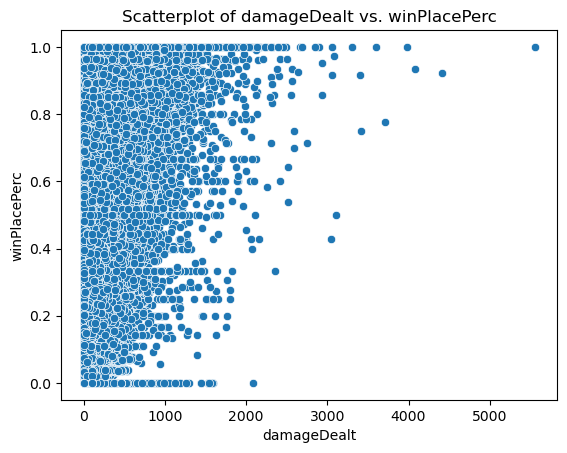

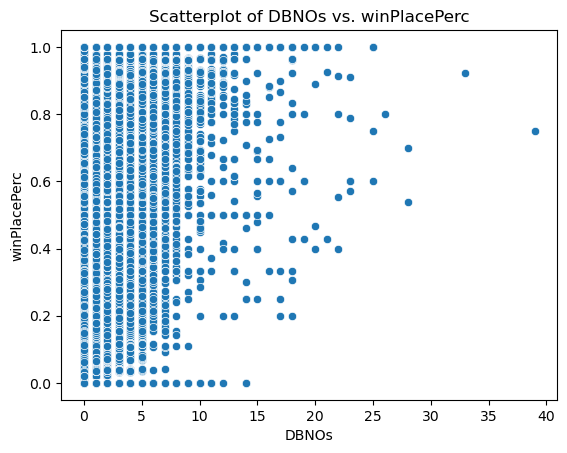

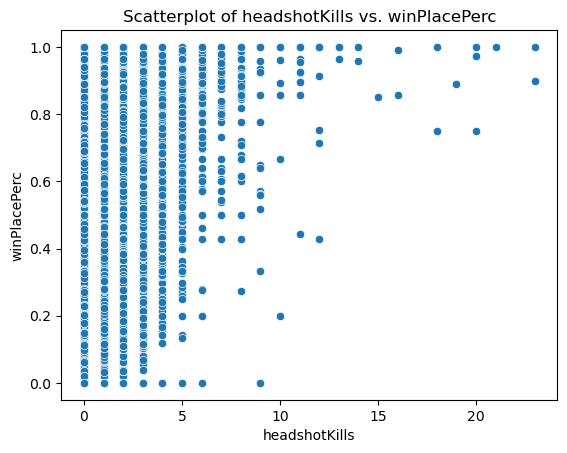

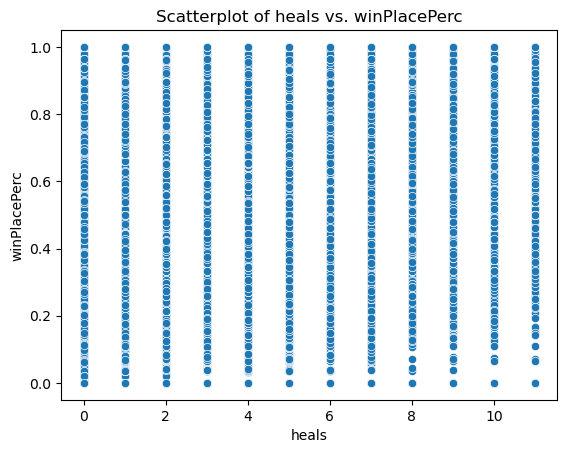

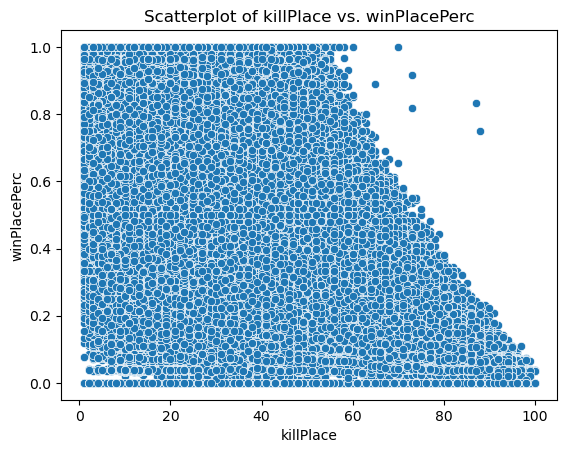

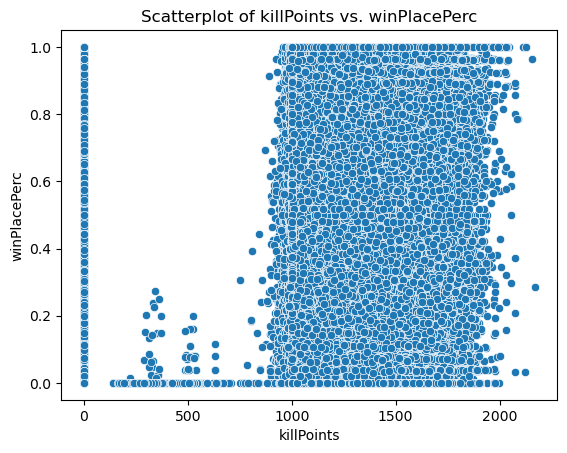

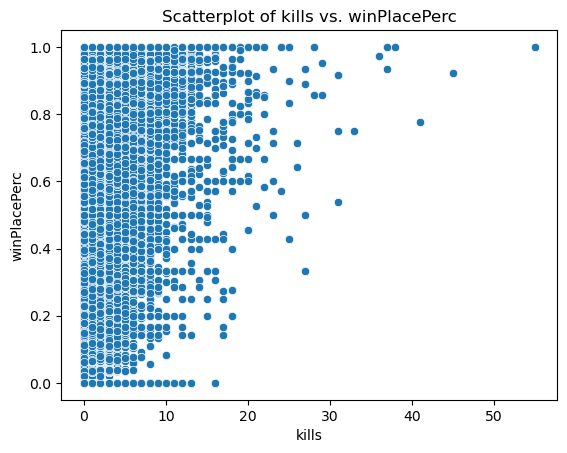

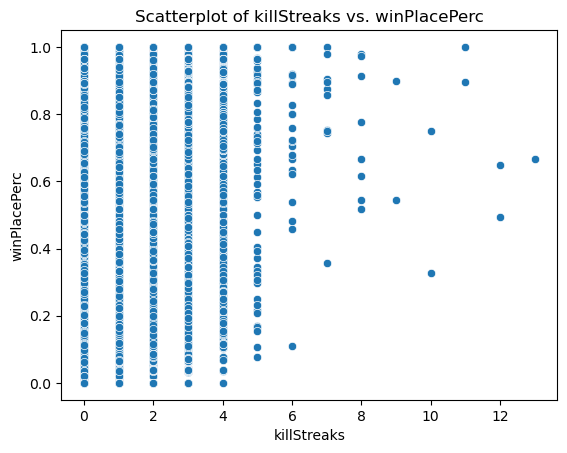

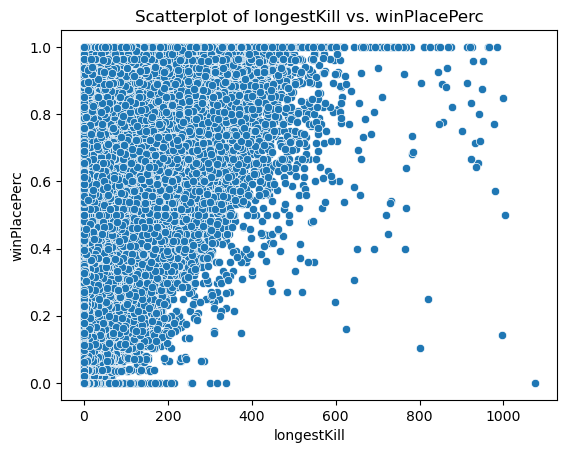

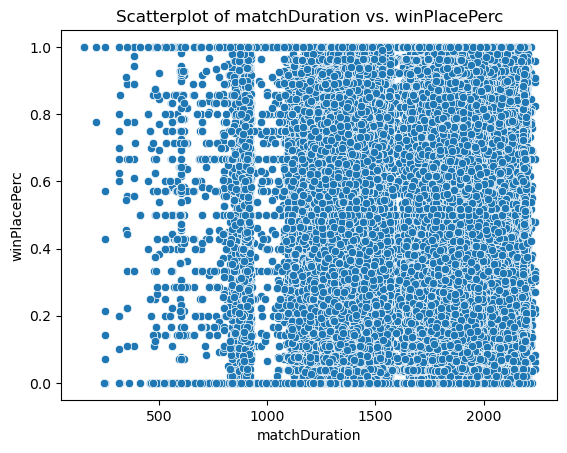

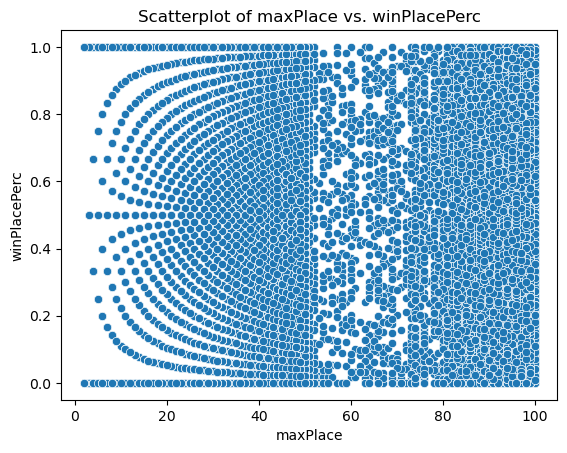

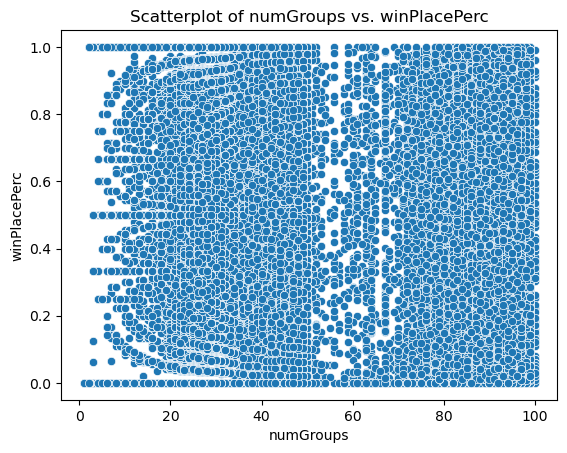

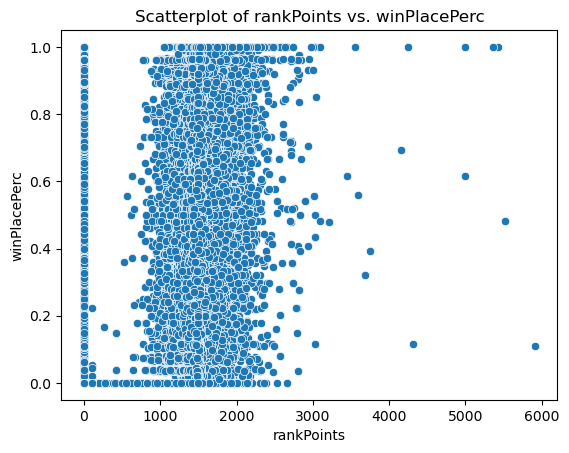

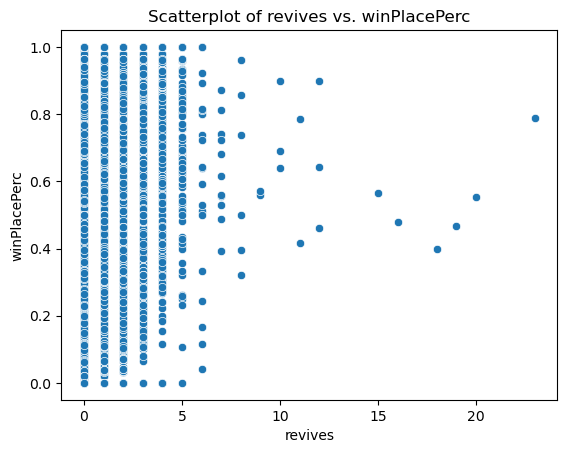

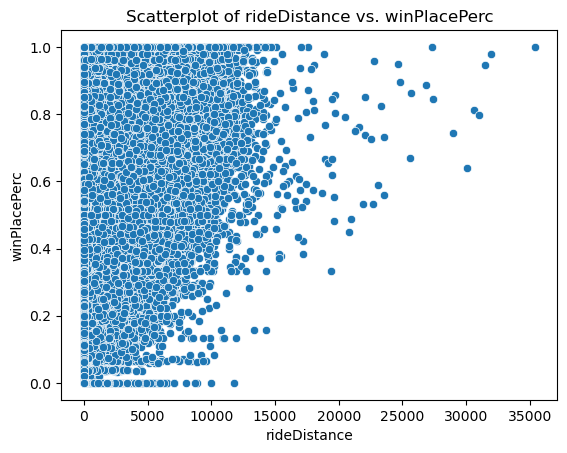

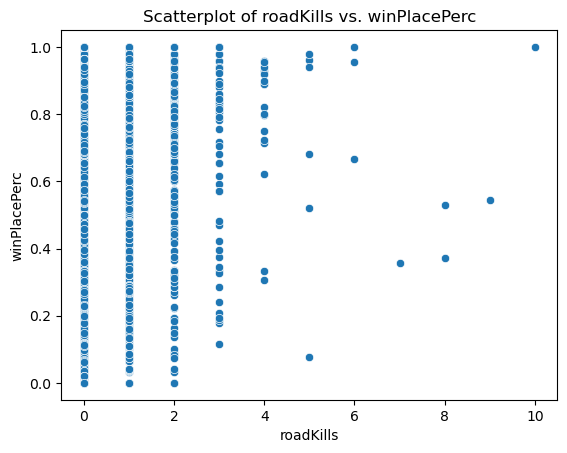

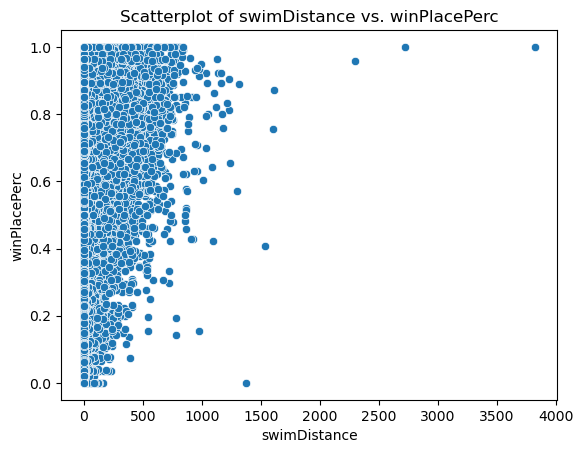

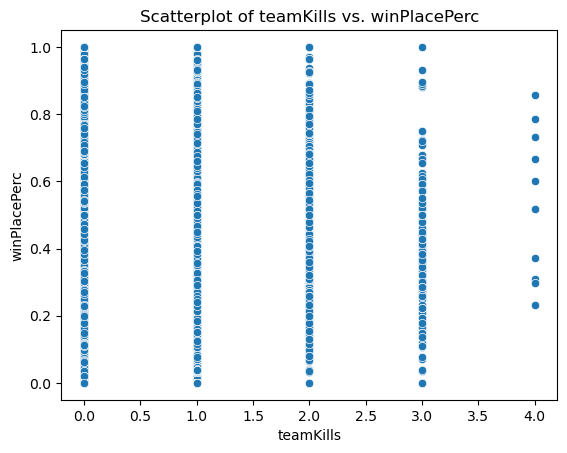

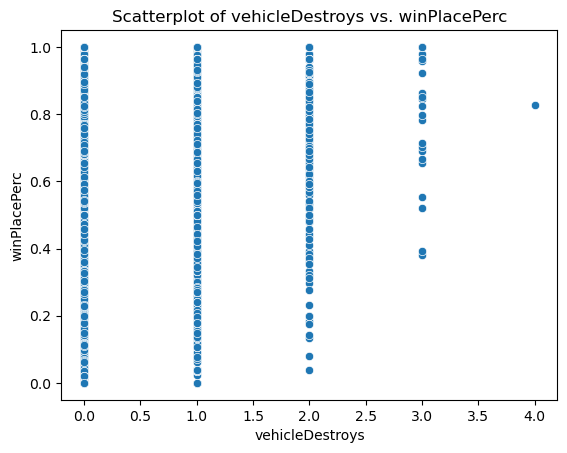

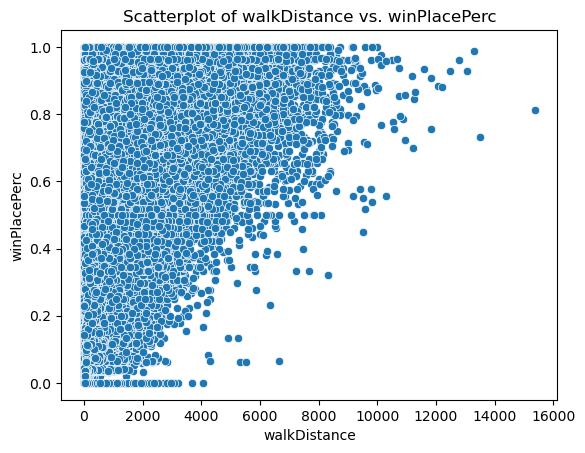

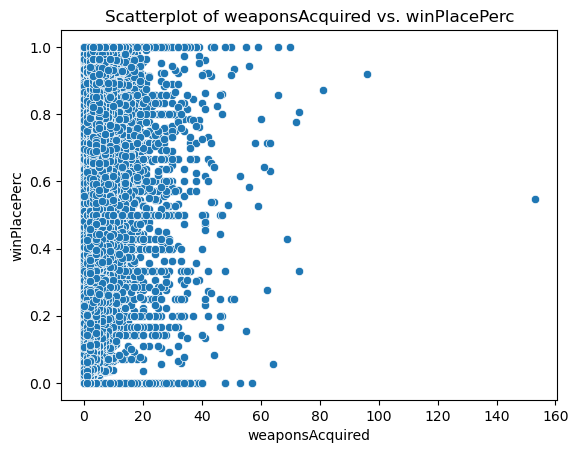

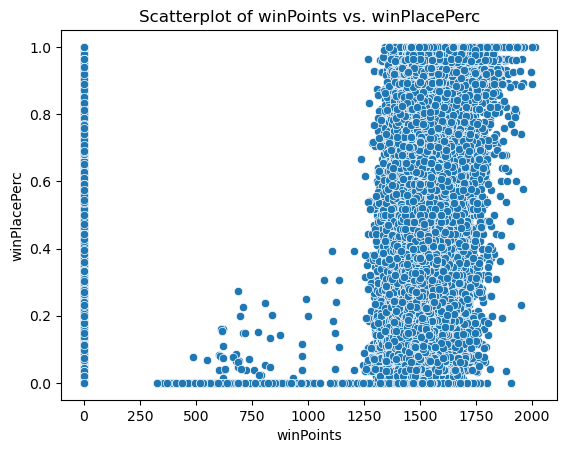

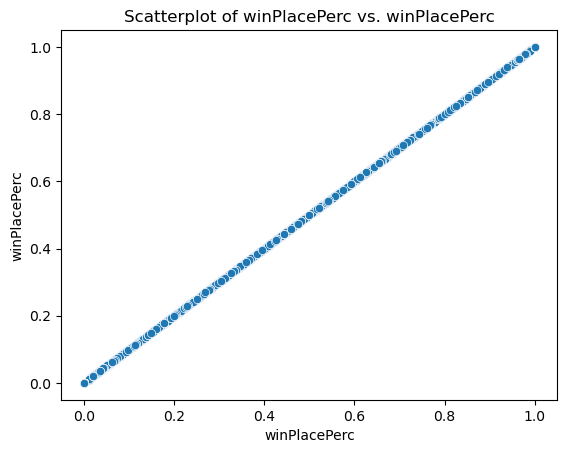

In [86]:
for column in pubg_cont:
    sns.scatterplot(x=column, y='winPlacePerc', data=pubg)
    plt.xlabel(column)
    plt.ylabel('winPlacePerc')
    plt.title(f'Scatterplot of {column} vs. winPlacePerc')
    plt.show()

<Figure size 2000x1000 with 0 Axes>

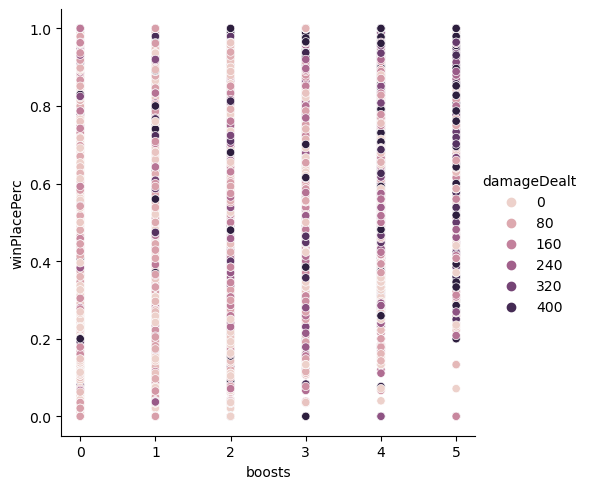

In [206]:
plt.figure(figsize=(20,10))
sns.relplot(x='boosts', y='winPlacePerc',data=pubg ,hue='damageDealt' )
plt.show()

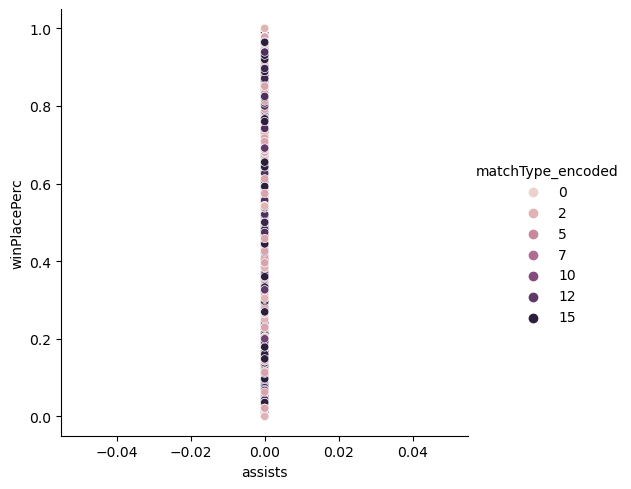

In [207]:
sns.relplot(x='assists', y='winPlacePerc',data=pubg ,hue='matchType_encoded' )
plt.show()

<Figure size 2000x1000 with 0 Axes>

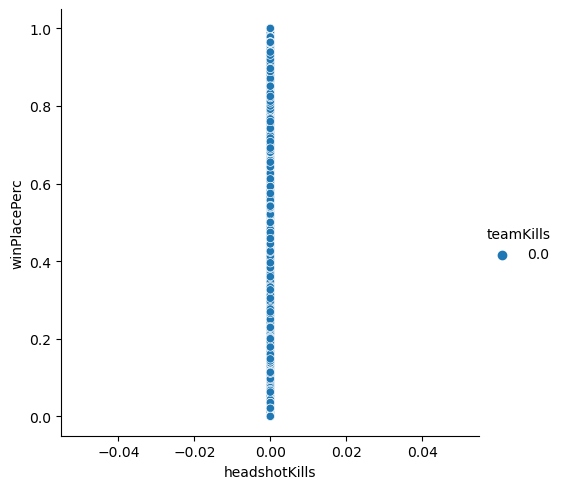

In [208]:
plt.figure(figsize=(20,10))
sns.relplot(x='headshotKills', y='winPlacePerc',data=pubg ,hue='teamKills' )
plt.show()

<Figure size 2000x1000 with 0 Axes>

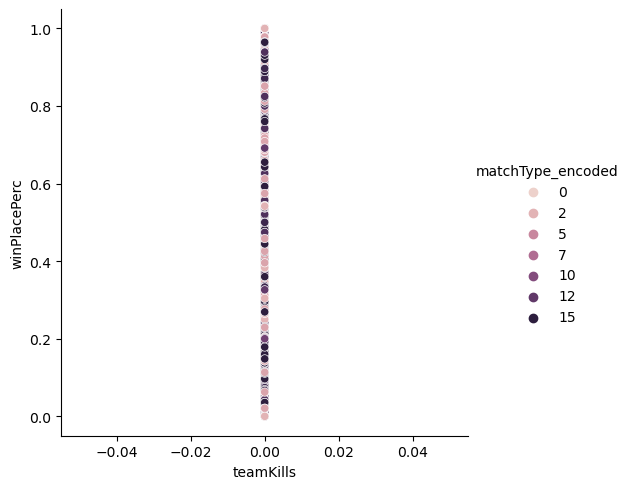

In [209]:
plt.figure(figsize=(20,10))
sns.relplot(x='teamKills', y='winPlacePerc',data=pubg ,hue='matchType_encoded' )
plt.show()

## Datapreprocessing and Feature enginnering

In [87]:
pubg.isnull().sum()

Id                   0
groupId              0
matchId              0
assists              0
boosts               0
damageDealt          0
DBNOs                0
headshotKills        0
heals                0
killPlace            0
killPoints           0
kills                0
killStreaks          0
longestKill          0
matchDuration        0
maxPlace             0
numGroups            0
rankPoints           0
revives              0
rideDistance         0
roadKills            0
swimDistance         0
teamKills            0
vehicleDestroys      0
walkDistance         0
weaponsAcquired      0
winPoints            0
winPlacePerc         0
team                 0
matchType_encoded    0
dtype: int64

In [88]:
missing_value=pubg.isna().sum() # no missing values are present
missing_value

Id                   0
groupId              0
matchId              0
assists              0
boosts               0
damageDealt          0
DBNOs                0
headshotKills        0
heals                0
killPlace            0
killPoints           0
kills                0
killStreaks          0
longestKill          0
matchDuration        0
maxPlace             0
numGroups            0
rankPoints           0
revives              0
rideDistance         0
roadKills            0
swimDistance         0
teamKills            0
vehicleDestroys      0
walkDistance         0
weaponsAcquired      0
winPoints            0
winPlacePerc         0
team                 0
matchType_encoded    0
dtype: int64

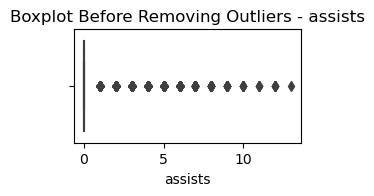

upper limit is 0.0
lower limit is 0.0


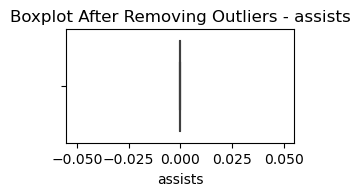

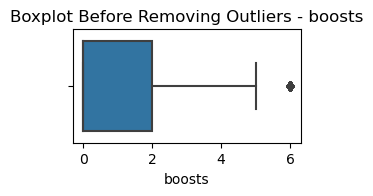

upper limit is 5.0
lower limit is -3.0


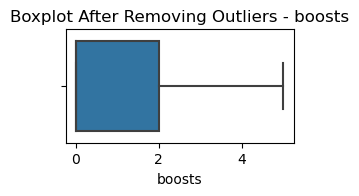

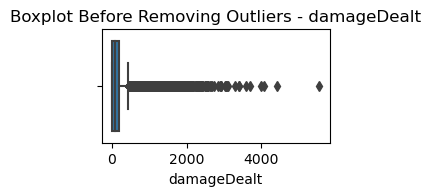

upper limit is 443.75
lower limit is -266.25


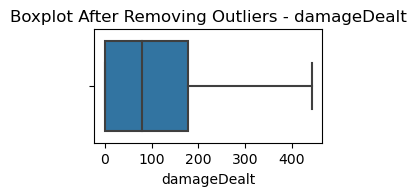

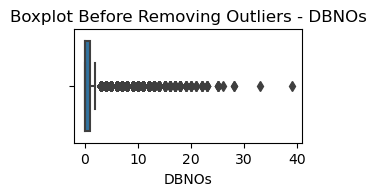

upper limit is 2.5
lower limit is -1.5


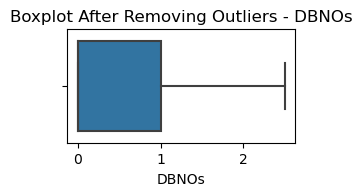

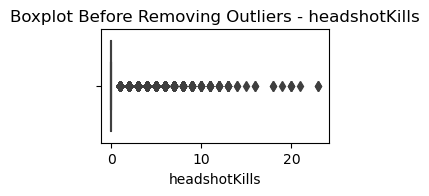

upper limit is 0.0
lower limit is 0.0


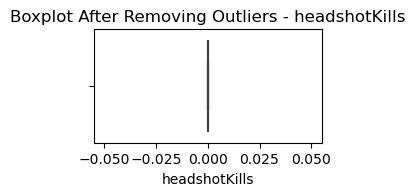

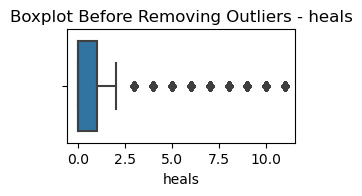

upper limit is 2.5
lower limit is -1.5


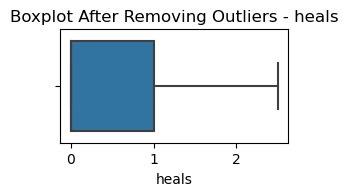

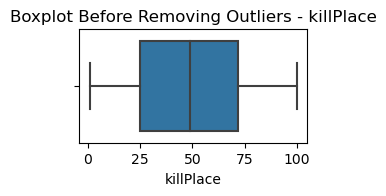

upper limit is 142.5
lower limit is -45.5


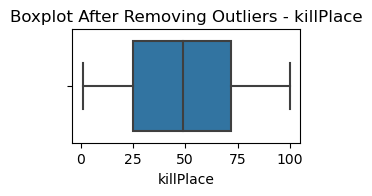

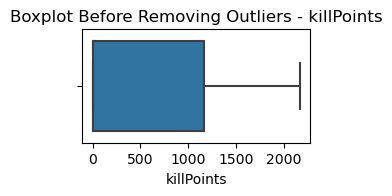

upper limit is 2925.0
lower limit is -1755.0


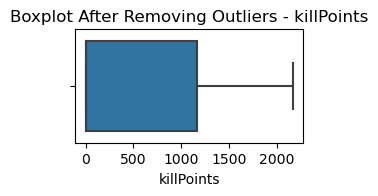

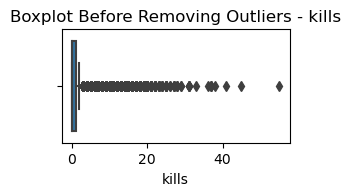

upper limit is 2.5
lower limit is -1.5


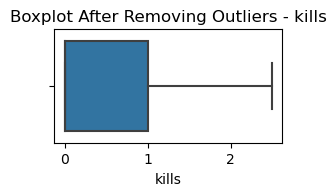

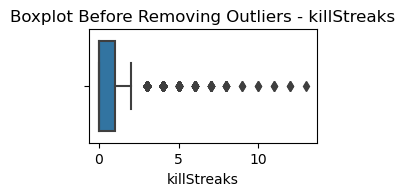

upper limit is 2.5
lower limit is -1.5


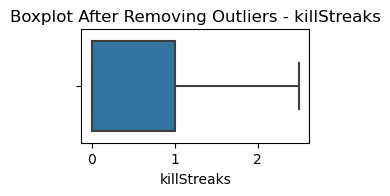

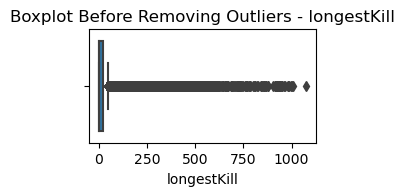

upper limit is 48.099999999999994
lower limit is -28.86


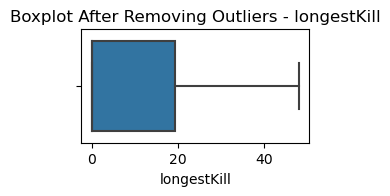

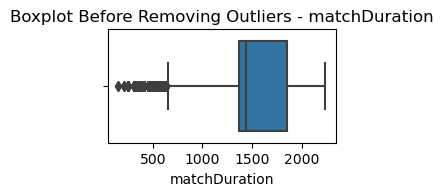

upper limit is 2573.5
lower limit is 641.5


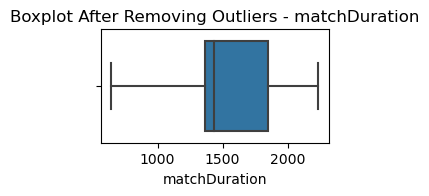

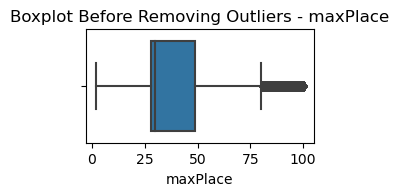

upper limit is 80.5
lower limit is -3.5


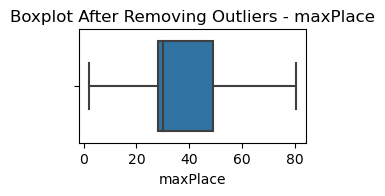

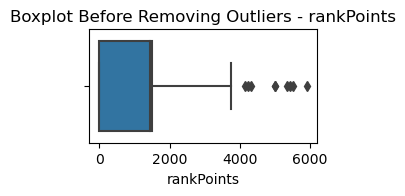

upper limit is 3751.5
lower limit is -2252.5


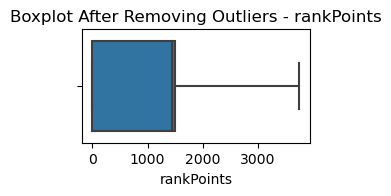

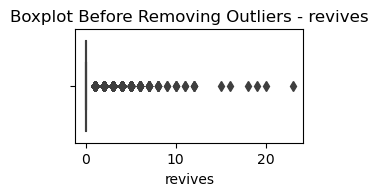

upper limit is 0.0
lower limit is 0.0


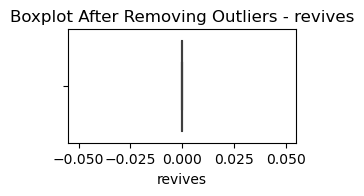

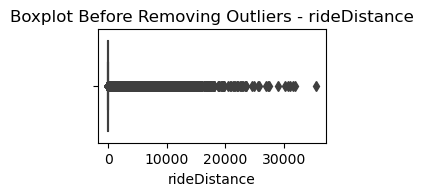

upper limit is 0.0
lower limit is 0.0


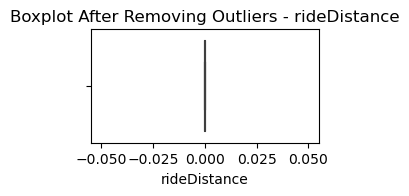

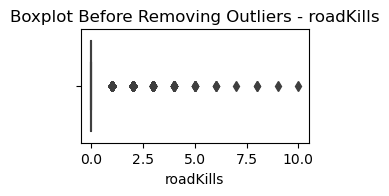

upper limit is 0.0
lower limit is 0.0


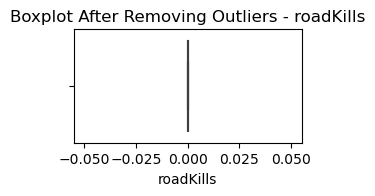

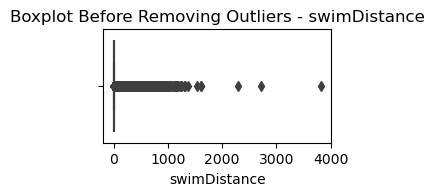

upper limit is 0.0
lower limit is 0.0


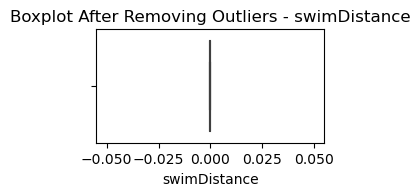

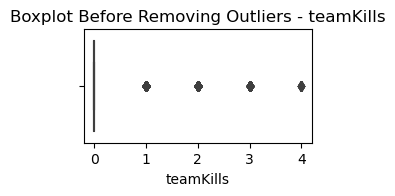

upper limit is 0.0
lower limit is 0.0


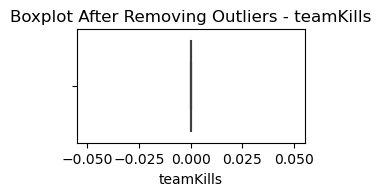

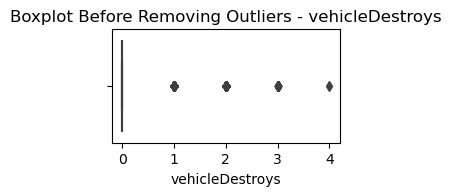

upper limit is 0.0
lower limit is 0.0


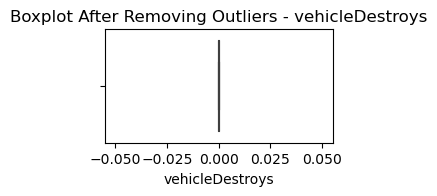

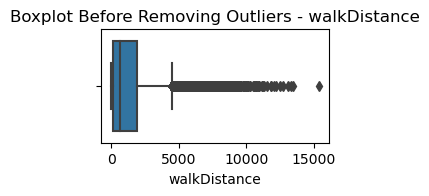

upper limit is 4490.2
lower limit is -2457.0


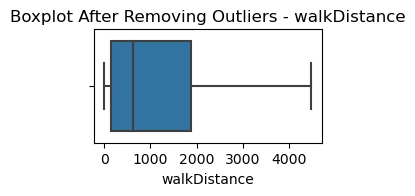

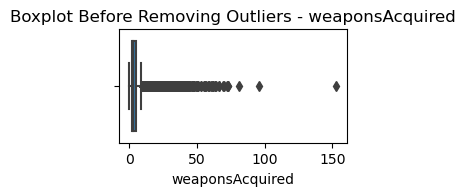

upper limit is 9.5
lower limit is -2.5


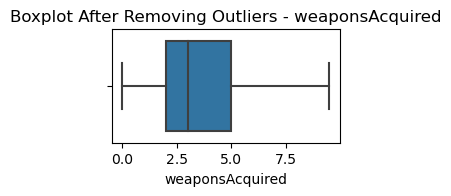

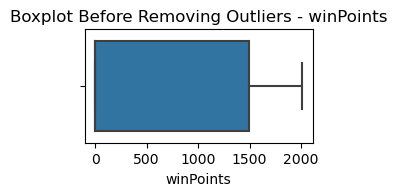

upper limit is 3737.5
lower limit is -2242.5


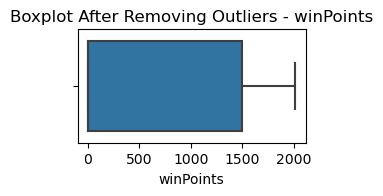

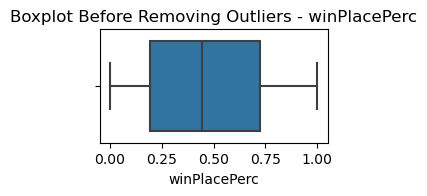

upper limit is 1.5200500000000001
lower limit is -0.60435


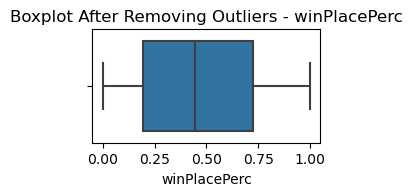

In [89]:
def plot_boxplot(pubg_cont, column):
    # Before removing outliers
    plt.figure(figsize=(10, 5))
    plt.subplot(3, 3, 1)
    sns.boxplot(x=column, data=pubg_cont)
    plt.title(f'Boxplot Before Removing Outliers - {column}')
    plt.show()

    # Remove outliers using the out_rev function
    U_L, L_L = out_rev(pubg_cont, column)
    print('upper limit is', U_L)
    print('lower limit is', L_L)
    pubg_cont[column] = np.where(pubg_cont[column] > U_L, U_L, np.where(pubg_cont[column] < L_L, L_L, pubg_cont[column]))

    # After removing outliers
    plt.figure(figsize=(10, 5))
    plt.subplot(3, 3, 1)
    sns.boxplot(x=column, data=pubg_cont)
    plt.title(f'Boxplot After Removing Outliers - {column}')
    plt.show()

def out_rev(pubg_cont, column):
    q1 = pubg_cont[column].quantile(0.25)
    q3 = pubg_cont[column].quantile(0.75)
    IQR = q3 - q1
    U_L = q3 + 1.5 * IQR
    L_L = q1 - 1.5 * IQR
    return U_L, L_L

# Columns for which you want to remove outliers and plot graphs
pubg_cont = ['assists', 'boosts', 'damageDealt', 'DBNOs',   # bivariate for continuous columns
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'maxPlace',
        'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc']
for column in pubg_cont:
    plot_boxplot(pubg, column)

## Model creation

In [90]:
X=pubg.drop(['winPlacePerc','Id', 'groupId', 'matchId'],axis=1)
Y=pubg['winPlacePerc']

In [91]:
X.shape

(865066, 26)

In [92]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3,random_state=42)

# Scaling the data¶

In [93]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_rf = scaler.fit_transform(X_train)
X_test_rf = scaler.transform(X_test)


X_train_scaledrf = pd.DataFrame(X_train_rf, columns=X_train.columns)
X_test_scaledrf = pd.DataFrame(X_test_rf, columns=X_test.columns)

In [94]:
from sklearn.preprocessing import PowerTransformer


power_transformer = PowerTransformer(
    method='yeo-johnson',  # 'yeo-johnson' 
    standardize=False,      # Whether to standardize the transformed data
    copy=True              # Whether to create a copy of the input data
)
X_train_p=power_transformer.fit_transform(X_train_rf)
X_test_p=power_transformer.transform(X_test_rf)



X_train_tr = pd.DataFrame(X_train_p, columns=X_train_scaledrf.columns)
X_test_tr = pd.DataFrame(X_test_p, columns=X_test_scaledrf.columns)

In [95]:
X_train_tr.head()

assists    boosts  damageDealt     DBNOs  headshotKills    heals  \
0      0.0 -0.000000     0.101059 -0.000000            0.0 -0.00000   
1      0.0 -0.000000    -0.613242 -0.000000            0.0 -0.00000   
2      0.0 -0.000000    -0.613242 -0.000000            0.0 -0.00000   
3      0.0  0.275748    -0.214852  0.377732            0.0  0.55025   
4      0.0 -0.000000    -0.613242 -0.000000            0.0 -0.00000   

   killPlace  killPoints     kills  killStreaks  ...  rideDistance  roadKills  \
0  -0.191391   -0.000000  0.450778     0.433076  ...           0.0        0.0   
1   0.596604    0.444871 -0.000000    -0.000000  ...           0.0        0.0   
2   0.596604    0.450275 -0.000000    -0.000000  ...           0.0        0.0   
3   0.148997    0.427371 -0.000000    -0.000000  ...           0.0        0.0   
4   0.085127   -0.000000 -0.000000    -0.000000  ...           0.0        0.0   

   swimDistance  teamKills  vehicleDestroys  walkDistance  weaponsAcquired  \
0           0.0        0.0              0.0     -0.383636        -0.360519   
1           0.0        0.0              0.0     -0.352133        -0.360519   
2           0.0        0.0              0.0     -0.342841         0.579804   
3           0.0        0.0              0.0      0.516084         0.308758   
4           0.0        0.0              0.0      0.226206         0.824149   

   winPoints      team  matchType_encoded  
0  -0.000000 -1.288955          -0.072607  
1   0.407760  0.000000           0.096264  
2   0.409448  0.000000           0.096264  
3   0.404614  0.000000           0.096264  
4  -0.000000  0.000000           0.000000  

[5 rows x 26 columns]

In [96]:
X_train_tr.shape

(605546, 26)

In [97]:
Y_train.head()

648652     0.2340
3270072    0.1786
710552     0.1600
2367660    0.5769
2334761    0.4483
Name: winPlacePerc, dtype: float64

In [98]:
Y_train.shape

(605546,)

In [99]:
X_test_tr.head()

assists    boosts  damageDealt     DBNOs  headshotKills     heals  \
0      0.0 -0.000000    -0.613242 -0.000000            0.0 -0.000000   
1      0.0  0.451818     0.241765 -0.000000            0.0  0.550250   
2      0.0  0.414342     0.683606  0.377732            0.0  0.550250   
3      0.0 -0.000000    -0.238187 -0.000000            0.0 -0.000000   
4      0.0  0.275748    -0.434603  0.377732            0.0  0.525559   

   killPlace  killPoints     kills  killStreaks  ...  rideDistance  roadKills  \
0   0.767322   -0.000000 -0.000000    -0.000000  ...           0.0        0.0   
1  -0.042548    0.433372 -0.000000    -0.000000  ...           0.0        0.0   
2  -0.552445   -0.000000  0.450778     0.433076  ...           0.0        0.0   
3   0.298104    0.469492 -0.000000    -0.000000  ...           0.0        0.0   
4   0.000000   -0.000000 -0.000000    -0.000000  ...           0.0        0.0   

   swimDistance  teamKills  vehicleDestroys  walkDistance  weaponsAcquired  \
0           0.0        0.0              0.0     -0.354900        -0.360519   
1           0.0        0.0              0.0      0.702766         0.579804   
2           0.0        0.0              0.0      0.416079         0.308758   
3           0.0        0.0              0.0     -0.289278        -0.360519   
4           0.0        0.0              0.0      0.285084         0.000000   

   winPoints      team  matchType_encoded  
0  -0.000000  0.000000           0.000000  
1   0.412652  0.000000           0.000000  
2  -0.000000  1.350096           0.096264  
3   0.428019  0.000000           0.096264  
4  -0.000000  0.000000           0.096264  

[5 rows x 26 columns]

In [100]:
X_test_tr.shape

(259520, 26)

In [101]:
Y_test.head()

1026999    0.1429
3496580    0.8929
4370054    0.7600
632788     0.3704
831500     0.5556
Name: winPlacePerc, dtype: float64

In [102]:
Y_test.shape

(259520,)

In [103]:
Y_train.head()

648652     0.2340
3270072    0.1786
710552     0.1600
2367660    0.5769
2334761    0.4483
Name: winPlacePerc, dtype: float64

In [104]:
Y_train.shape

(605546,)

In [105]:
lr=LinearRegression()
lr.fit(X_train_tr,Y_train)

LinearRegression()

In [106]:
lr_p_test=lr.predict(X_test_tr)

In [107]:
lr_p_test.shape

(259520,)

In [108]:
R2score=r2_score(Y_test,lr_p_test)
R2score

0.8660306493178381

In [109]:
lr_p_train=lr.predict(X_train_tr)

In [110]:
r2score=r2_score(Y_train,lr_p_train)
r2score

0.8647677761624705

In [118]:
Difference= ( R2score - r2score)
Difference

0.0012628731553676609

In [112]:
Y_test.shape

(259520,)

In [113]:
# Calculate the number of observations (n) and the number of predictors (k)
n = len(Y_test)
k = X_test_tr.shape[1]
print(n, k)

# Display the R-squared score
print("R2_score:", r2score)


259520 26
R2_score: 0.8647677761624705


In [114]:
# Calculate the adjusted R-squared (adjusted R2)
adjusted_r2 = 1 - (1 - 0.8710243229554406 ) * (266818 - 1) / (266818 - 25 - 1)
#adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print("R2_score:", r2score)
print("Adjusted_R2_Score:", adjusted_r2)



R2_score: 0.8647677761624705
Adjusted_R2_Score: 0.8710122371660387


In [115]:
import math
print(mean_squared_error(Y_test,lr_p_test)) 
print(math.sqrt(mean_squared_error(Y_test,lr_p_test)))

0.012322521158536466
0.11100685185400254


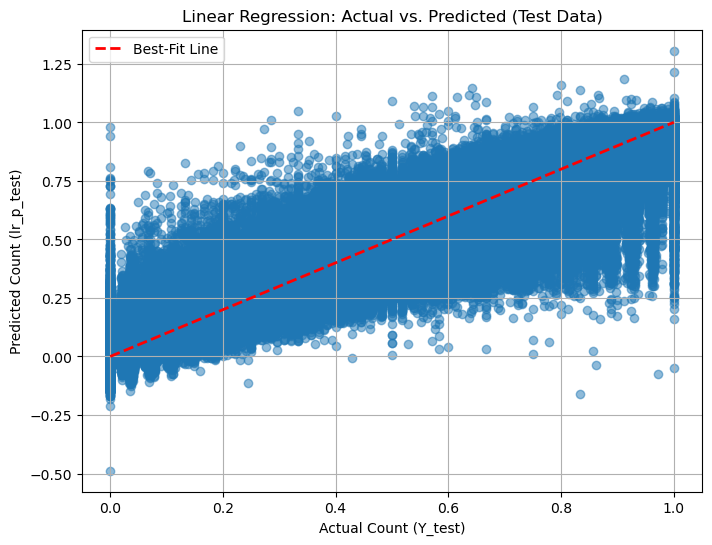

In [116]:
import matplotlib.pyplot as plt

# Scatter plot for test data
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, lr_p_test, alpha=0.5)
plt.title('Linear Regression: Actual vs. Predicted (Test Data)')
plt.xlabel('Actual Count (Y_test)')
plt.ylabel('Predicted Count (lr_p_test)')
plt.grid(True)

# Plot the best-fit line (y = x)
plt.plot([min(Y_test.values), max(Y_test.values)], [min(Y_test.values), max(Y_test.values)], color='red', linestyle='--', linewidth=2, label='Best-Fit Line')

# Add a legend
plt.legend()

# Show the plot
plt.show()

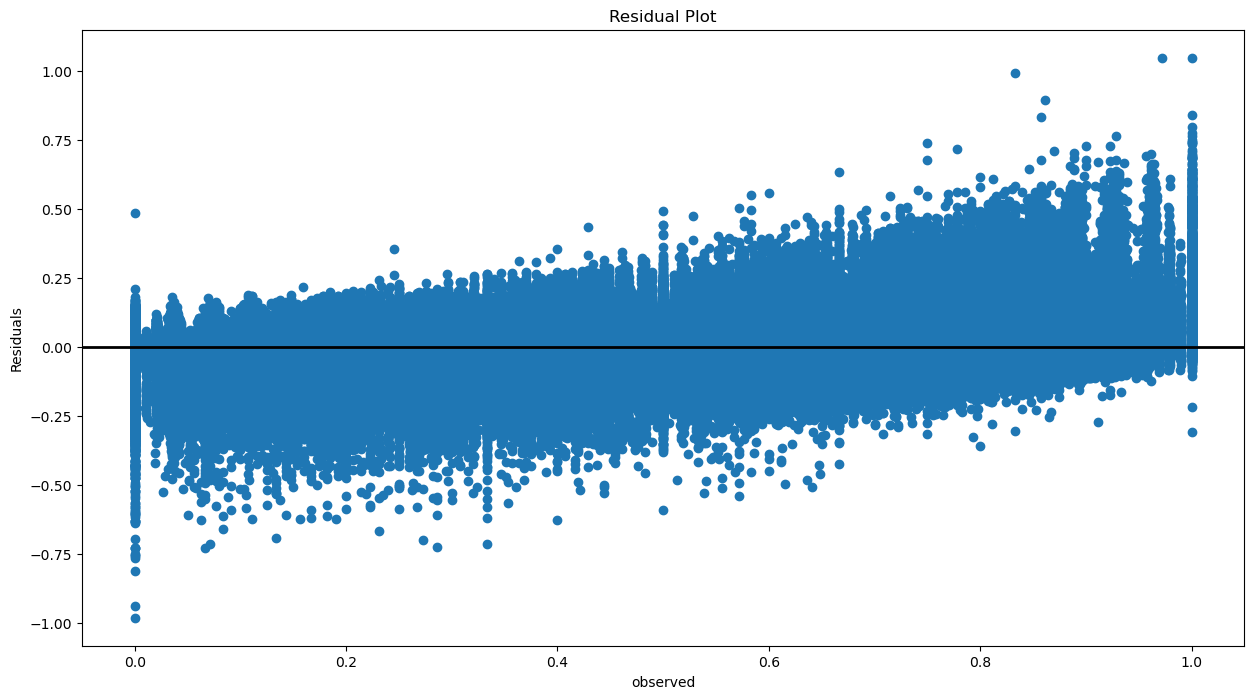

In [117]:
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(Y_test,Y_test-lr_p_test)
ax.axhline(lw=2,color="black")
ax.set_xlabel("observed")
ax.set_ylabel("Residuals")
ax.title.set_text("Residual Plot")
plt.show()

# Laso

In [160]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}
lasso_reg=GridSearchCV(lasso,params,scoring='r2',cv=10)
lasso_reg.fit(X_train_tr,Y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20]},
             scoring='r2')

In [161]:
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

{'alpha': 1e-08}
0.8647516868340354


In [164]:
la_p_test=lasso_reg.predict(X_test_tr)

In [165]:
r2score=r2_score(Y_test,la_p_test)
r2score

0.8660306464373587

In [166]:
la_p_train=lasso_reg.predict(X_train_tr)

In [168]:
R2score=r2_score(Y_train,la_p_train)
R2score

0.8647677748762543

In [170]:
Difference=(r2score - R2score )
Difference

0.001262871561104384

In [171]:
n = len(Y_test)
k = X_test_tr.shape[1]
print(n, k)

# Display the R-squared score
print("R2 score:", r2score)


259520 26
R2 score: 0.8660306464373587


In [172]:
# Calculate the adjusted R-squared (adjusted R2)
adjusted_r2 = 1 - (1 - 0.8660306464373587 ) * (222349 - 1) / (222349 - 25 - 1)
#adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print("R2_score:", r2score)
print("Adjusted_R2_Score:", adjusted_r2)



R2_score: 0.8660306464373587
Adjusted_R2_Score: 0.8660155817169336


In [173]:
import math
print(mean_squared_error(Y_test,la_p_test)) 
print(math.sqrt(mean_squared_error(Y_test,la_p_test)))

0.0123225214234834
0.11100685304738352


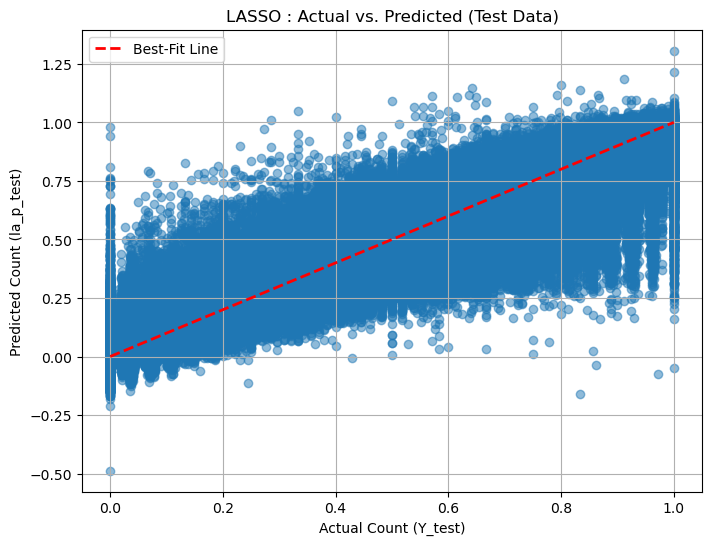

In [174]:
import matplotlib.pyplot as plt

# Scatter plot for test data
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, la_p_test, alpha=0.5)
plt.title('LASSO : Actual vs. Predicted (Test Data)')
plt.xlabel('Actual Count (Y_test)')
plt.ylabel('Predicted Count (la_p_test)')
plt.grid(True)

# Add a line for perfect predictions
plt.plot([min(Y_test.values), max(Y_test.values)], [min(Y_test.values), max(Y_test.values)], color='red', linestyle='--', linewidth=2, label='Best-Fit Line')

# Add a legend
plt.legend()

# Show the plot
plt.show()

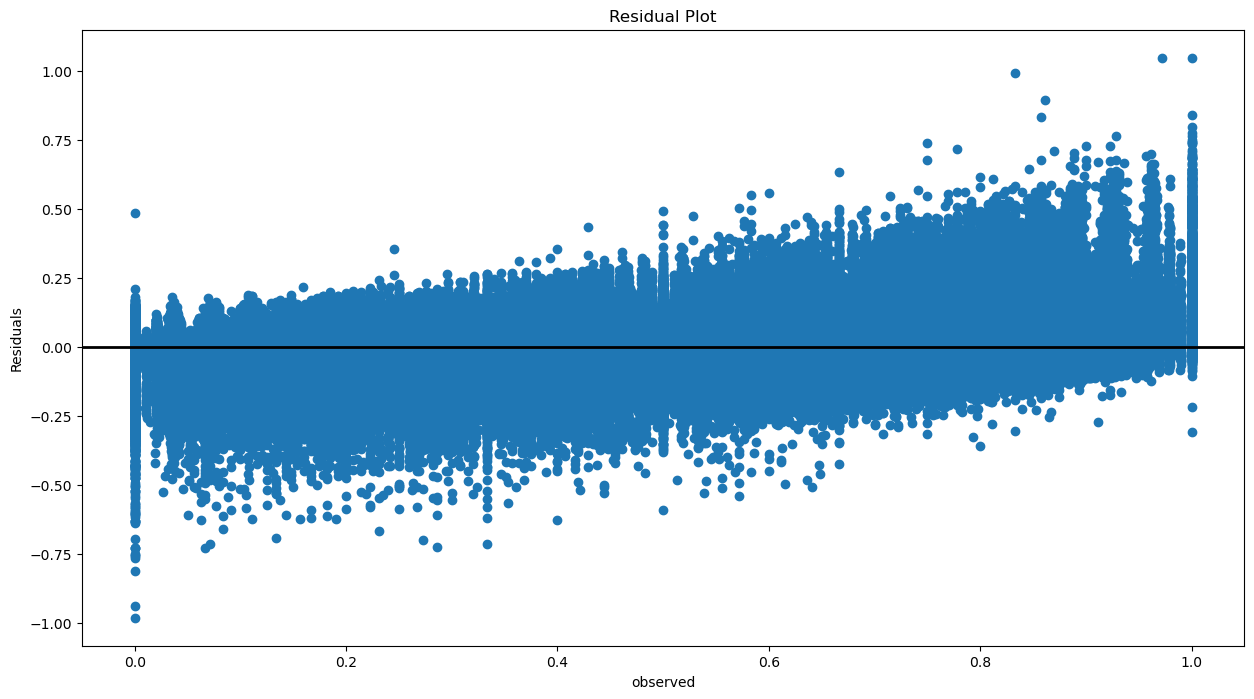

In [175]:
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(Y_test,Y_test-la_p_test)
ax.axhline(lw=2,color="black")
ax.set_xlabel("observed")
ax.set_ylabel("Residuals")
ax.title.set_text("Residual Plot")
plt.show()

# Ridge 

In [119]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
Ridge=Ridge()
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20]}
ridge_reg=GridSearchCV(Ridge,params,scoring='r2',cv=10)
ridge_reg.fit(X_train_tr,Y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20]},
             scoring='r2')

In [121]:
y_test_pred = ridge_reg.predict(X_test_tr)
y_train_pred = ridge_reg.predict(X_train_tr)

In [122]:
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

{'alpha': 0.01}
0.8647516892303881


In [123]:
r2score_testRI=r2_score(Y_test,y_test_pred)
r2score_testRI

0.8660306482177154

In [124]:
r2score_trainRI=r2_score(Y_train,y_train_pred)
r2score_trainRI

0.8647677761601814

In [126]:
difference=r2score_testRI-r2score_trainRI
difference

0.001262872057533948

In [129]:
n = len(Y_test)
k = X_test_tr.shape[1]
print(n, k)

# Display the R-squared score
print("R2 score:", r2score)


259520 26
R2 score: 0.8647677761624705


In [130]:
# Calculate the adjusted R-squared (adjusted R2)
adjusted_r2 = 1 - (1 -  0.8474043899705711 ) * (222349 - 1) / (222349 - 25 - 1)
#adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print("R2_score:", r2score)
print("Adjusted_R2_Score:", adjusted_r2)


R2_score: 0.8647677761624705
Adjusted_R2_Score: 0.8473872307461511


In [131]:
import math
print(mean_squared_error(Y_test,y_test_pred))
print(math.sqrt(mean_squared_error(Y_test,y_test_pred)))
print(mean_absolute_error(Y_test,y_test_pred))

0.012322521259725919
0.11100685230978274
0.08155592651771149


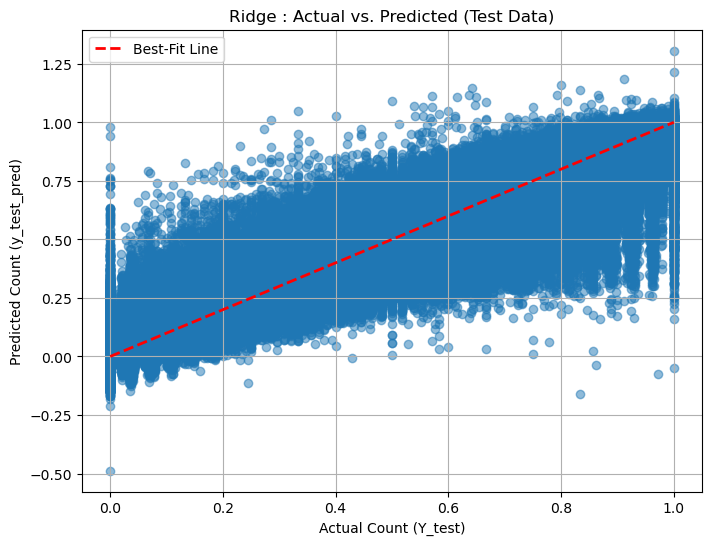

In [132]:
import matplotlib.pyplot as plt

# Scatter plot for test data
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_test_pred, alpha=0.5)
plt.title('Ridge : Actual vs. Predicted (Test Data)')
plt.xlabel('Actual Count (Y_test)')
plt.ylabel('Predicted Count (y_test_pred)')
plt.grid(True)

# Add a line for perfect predictions
plt.plot([min(Y_test.values), max(Y_test.values)], [min(Y_test.values), max(Y_test.values)], color='red', linestyle='--', linewidth=2, label='Best-Fit Line')

# Add a legend
plt.legend()

# Show the plot
plt.show()

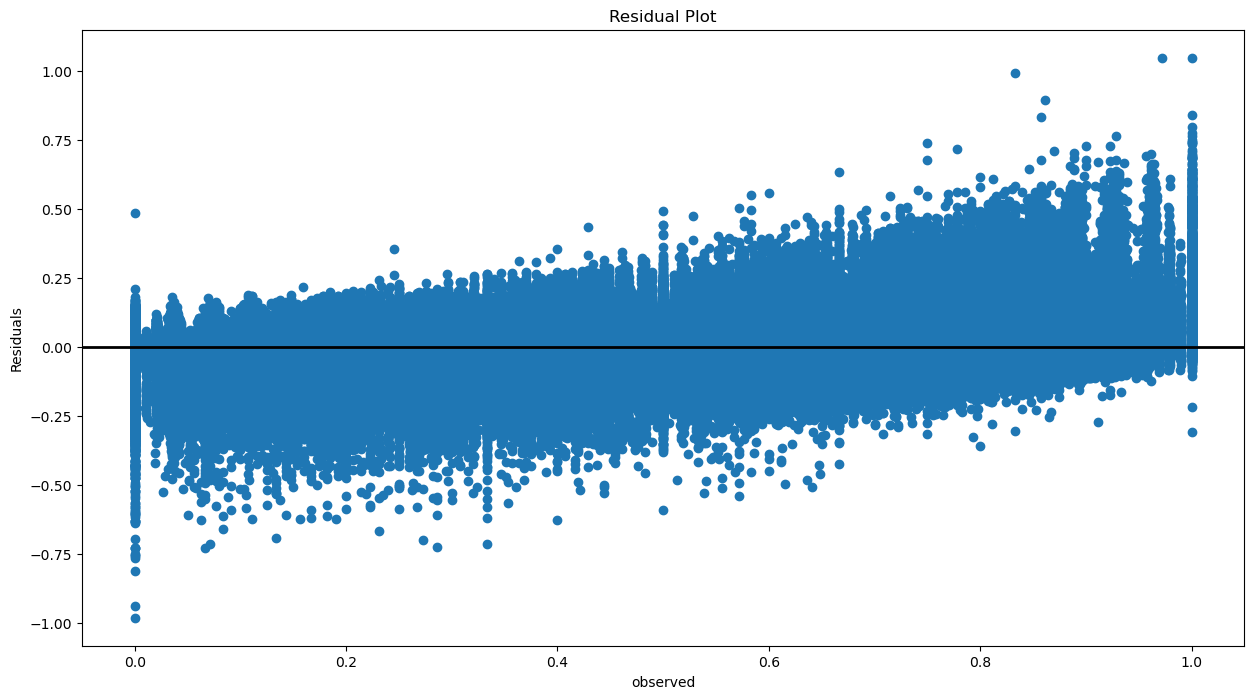

In [176]:
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(Y_test,Y_test-y_test_pred)
ax.axhline(lw=2,color="black")
ax.set_xlabel("observed")
ax.set_ylabel("Residuals")
ax.title.set_text("Residual Plot")
plt.show()

# Random Forest

In [177]:
rf=RandomForestRegressor()

In [178]:
rf.fit(X_train_tr,Y_train)

RandomForestRegressor()

In [179]:
rf_p_test=rf.predict(X_test_tr)

In [180]:
r2score=r2_score(Y_test,rf_p_test)
r2score

0.9220248716264652

In [181]:
rf_p_train=rf.predict(X_train_tr)

In [182]:
R2score=r2_score(Y_train,rf_p_train)
R2score

0.9889095871274498

In [183]:
Difference = (R2score - r2score)
Difference

0.06688471550098463

In [184]:
n = len(Y_test)
k = X_test_tr.shape[1]
print(n, k)

# Display the R-squared score
print("R2 score:", r2score)


259520 26
R2 score: 0.9220248716264652


In [185]:
# Calculate the adjusted R-squared (adjusted R2)
adjusted_r2 = 1 - (1 - 0.9250029730517446 ) * (222349 - 25 ) / (222349 - 25 - 1)
#adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print("R-squared (R2) Score:", r2score)
print("Adjusted R-squared (Adjusted R2) Score:", adjusted_r2)

R-squared (R2) Score: 0.9220248716264652
Adjusted R-squared (Adjusted R2) Score: 0.9250026357181041


In [186]:
import math
print(mean_squared_error(Y_test,rf_p_test)) 
print(math.sqrt(mean_squared_error(Y_test,rf_p_test)))

0.00717216411313411
0.08468863036520374


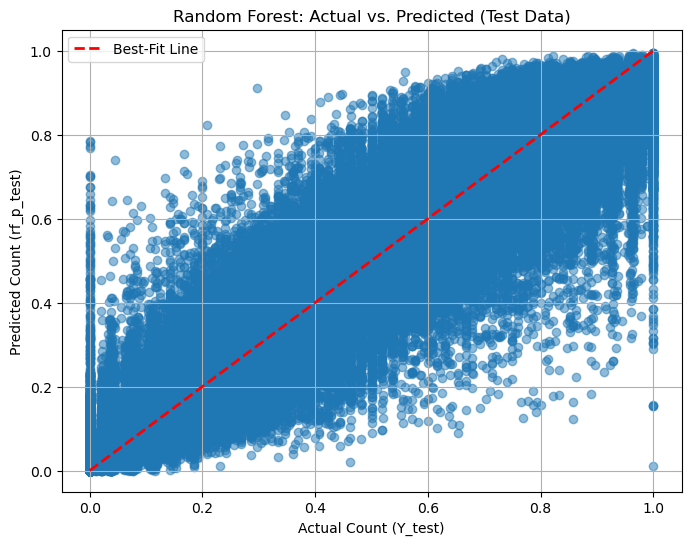

In [187]:
import matplotlib.pyplot as plt

# Scatter plot for test data
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, rf_p_test, alpha=0.5)
plt.title('Random Forest: Actual vs. Predicted (Test Data)')
plt.xlabel('Actual Count (Y_test)')
plt.ylabel('Predicted Count (rf_p_test)')
plt.grid(True)

# Add a line for perfect predictions
plt.plot([min(Y_test.values), max(Y_test.values)], [min(Y_test.values), max(Y_test.values)], color='red', linestyle='--', linewidth=2, label='Best-Fit Line')

# Add a legend
plt.legend()

# Show the plot
plt.show()


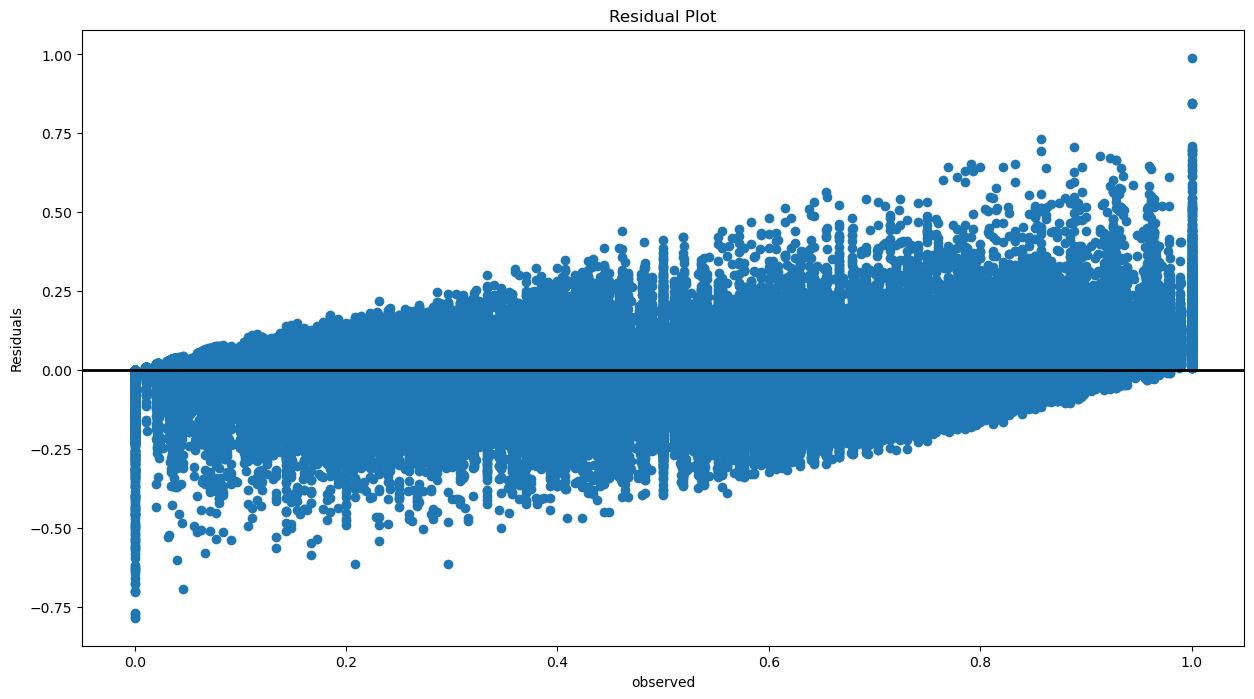

In [188]:
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(Y_test,Y_test - rf_p_test)
ax.axhline(lw=2,color="black")
ax.set_xlabel("observed")
ax.set_ylabel("Residuals")
ax.title.set_text("Residual Plot")
plt.show()

# ANN

In [146]:
pip install tensorflow


In [148]:
import tensorflow as tf
from keras import models
from keras import layers
from keras import optimizers
from keras.layers import Dropout

model=models.Sequential()
model.add(layers.Dense(512,activation='relu',input_shape=(X_train_tr.shape[1],)))
model.add(Dropout(0.2))
model.add(layers.Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1))



In [149]:
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])

model.fit(X_train_tr,Y_train,epochs=16,batch_size=512)

Y_pred_DL=model.predict(X_test_tr)

Epoch 1/16
1183/1183 [==============================] - 31s 25ms/step - loss: 0.0132 - mae: 0.0824
Epoch 2/16
1183/1183 [==============================] - 40s 34ms/step - loss: 0.0094 - mae: 0.0704
Epoch 3/16
1183/1183 [==============================] - 41s 35ms/step - loss: 0.0089 - mae: 0.0684
Epoch 4/16
1183/1183 [==============================] - 40s 34ms/step - loss: 0.0086 - mae: 0.0672
Epoch 5/16
1183/1183 [==============================] - 44s 37ms/step - loss: 0.0084 - mae: 0.0664
Epoch 6/16
1183/1183 [==============================] - 44s 37ms/step - loss: 0.0083 - mae: 0.0658
Epoch 7/16
1183/1183 [==============================] - 42s 36ms/step - loss: 0.0081 - mae: 0.0652
Epoch 8/16
1183/1183 [==============================] - 47s 40ms/step - loss: 0.0080 - mae: 0.0648
Epoch 9/16
1183/1183 [==============================] - 44s 37ms/step - loss: 0.0079 - mae: 0.0646
Epoch 10/16
1183/1183 [==============================] - 48s 41ms/step - loss: 0.0079 - mae: 0.0643
Epoch 11/

In [215]:
Y_pred_train=model.predict(X_train_tr)

18924/18924 [==============================] - 111s 6ms/step


In [219]:
r2score_test=r2_score(Y_test,Y_pred_DL)
r2score_test

0.9075542177475386

In [220]:
R2score_train=r2_score(Y_train,Y_pred_train)
R2score_train

0.9075485629507006

In [158]:
n = len(Y_test)
k = X_test_tr.shape[1]
print(n, k)

# Display the R-squared score
print("R2 score:", r2score)


259520 26
R2 score: 0.9075542177475386


In [118]:
# Calculate the adjusted R-squared (adjusted R2)
adjusted_r2 = 1 - (1 - 0.9299435588836682 ) * (222349 - 25 ) / (222349 - 25 - 1)
#adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print("R-squared (R2) Score:", r2score)
print("Adjusted R-squared (Adjusted R2) Score:", adjusted_r2)

R-squared (R2) Score: 0.9283623726062556
Adjusted R-squared (Adjusted R2) Score: 0.9299432437725861


In [119]:
import math
print(mean_squared_error(Y_test,Y_pred_DL)) 
print(math.sqrt(mean_squared_error(Y_test,Y_pred_DL)))

0.07166762674075187
0.26770809987886407


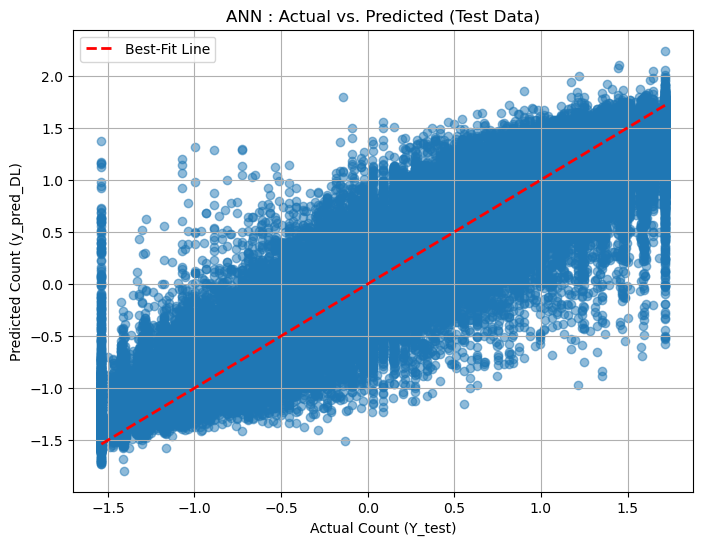

In [120]:
import matplotlib.pyplot as plt

# Scatter plot for test data
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred_DL, alpha=0.5)
plt.title('ANN : Actual vs. Predicted (Test Data)')
plt.xlabel('Actual Count (Y_test)')
plt.ylabel('Predicted Count (Y_pred_DL)')
plt.grid(True)

# Add a line for perfect predictions
plt.plot([min(Y_test.values), max(Y_test.values)], [min(Y_test.values), max(Y_test.values)], color='red', linestyle='--', linewidth=2, label='Best-Fit Line')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Gradient Boosting

In [133]:
## importing the model library
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier() ## object creation


In [134]:
## Installing XGB library
!pip install xgboost

In [135]:
## model creation
import xgboost as xgb
model=xgb.XGBRegressor()

In [136]:
model.fit(X_train_tr,Y_train)# fitting the data


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [137]:
xgb_p_test=model.predict(X_test_tr)

In [138]:
r2score=r2_score(Y_test,xgb_p_test)
r2score

0.9254580042686353

In [139]:
xgb_p_train=model.predict(X_train_tr)

In [140]:
R2score=r2_score(Y_train,xgb_p_train)
R2score

0.9293481328999451

In [141]:
Difference = R2score - r2score
Difference

0.003890128631309775

In [142]:
n = len(Y_test)
k = X_test_tr.shape[1]
print(n, k)

# Display the R-squared score
print("R2 score:", r2score)


259520 26
R2 score: 0.9254580042686353


In [143]:
# Calculate the adjusted R-squared (adjusted R2)
adjusted_r2 = 1 - (1 - 0.9254580042686353 ) * (222349 - 25 ) / (222349 - 25 - 1)
#adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print("R-squared (R2) Score:", r2score)
print("Adjusted R-squared (Adjusted R2) Score:", adjusted_r2)

R-squared (R2) Score: 0.9254580042686353
Adjusted R-squared (Adjusted R2) Score: 0.9254576689817071


In [144]:
import math
print(mean_squared_error(Y_test,xgb_p_test)) 
print(math.sqrt(mean_squared_error(Y_test,xgb_p_test)))

0.006856384052935338
0.08280328527863696


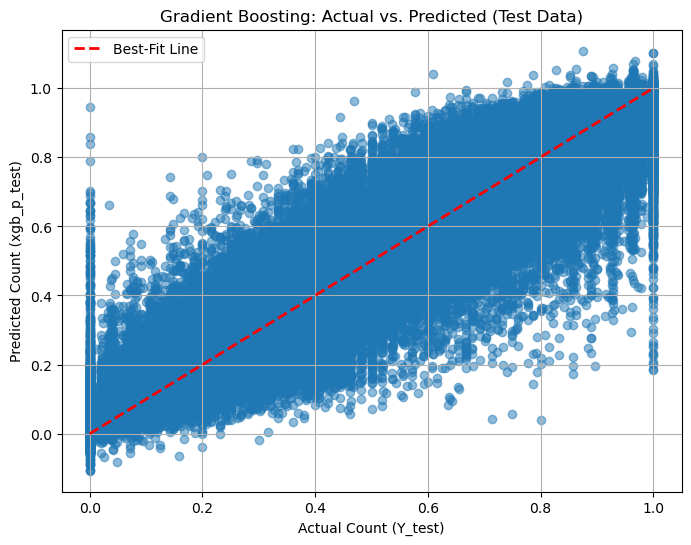

In [193]:
import matplotlib.pyplot as plt

# Scatter plot for test data
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, xgb_p_test, alpha=0.5)
plt.title('Gradient Boosting: Actual vs. Predicted (Test Data)')
plt.xlabel('Actual Count (Y_test)')
plt.ylabel('Predicted Count (xgb_p_test)')
plt.grid(True)

# Add a line for perfect predictions
plt.plot([min(Y_test.values), max(Y_test.values)], [min(Y_test.values), max(Y_test.values)], color='red', linestyle='--', linewidth=2, label='Best-Fit Line')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Model Comparison Report:

Code to demonstrates the use of several regression algorithms to build predictive models and calculate their Root Mean Squared Error (RMSE) on a given dataset.

In [195]:
!pip install lightgbm

     ---------------------------------------- 1.3/1.3 MB 5.2 MB/s eta 0:00:00


In [196]:
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
import numpy as np



def rmsle(Y, pred):
    log_Y = np.log1p(Y)
    log_pred = np.log1p(pred)
    squared_error = (log_Y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def evaluate(reg_cls, params=None):
    reg = reg_cls()
    if params:
        reg = GridSearchCV(reg, param_grid=params, refit=True)
    reg.fit(X_train_tr, Y_train)
    pred = reg.predict(X_test_tr)

    Y_test_exp = np.expm1(Y_test.values.ravel())
    pred_exp = np.expm1(pred)

    pred_train = reg.predict(X_train_tr)
    r2_train = r2_score(Y_train, pred_train)

    r2_test = r2_score(Y_test_exp, pred_exp)
    r2_score_difference = r2_test - r2_train
    
    return reg, r2_test, r2_train, r2_score_difference


model_names = [
    'LinearRegression', 'Ridge', 'Lasso', 'RandomForestRegressor', 
    'GradientBoostingRegressor', 'XGBRegressor', 'LGBMRegressor'
]
models = [
    LinearRegression, Ridge, Lasso, RandomForestRegressor, 
    GradientBoostingRegressor, XGBRegressor, LGBMRegressor
]

results = []

for model_cls, model_name in zip(models, model_names):
    reg, r2_test, r2_train, r2_score_diff = evaluate(model_cls)
    
    
    pred = reg.predict(X_test_tr)
    Y_test_exp = np.expm1(Y_test.values.ravel())
    pred_exp = np.expm1(pred)
    rmsle_value = rmsle(Y_test_exp, pred_exp)
    
    results.append({
        'Model': model_name,
        'RMSLE_SCORE': rmsle_value,
        'R2_Test': r2_test,
        'R2_Train': r2_train,
        'R2_Difference': r2_score_diff
    })


print(results)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2115
[LightGBM] [Info] Number of data points in the train set: 605546, number of used features: 18
[LightGBM] [Info] Start training from score 0.461424
                       Model  RMSLE_SCORE   R2_Test  R2_Train  R2_Difference
0           LinearRegression     0.111007  0.843417  0.864768      -0.021351
1                      Ridge     0.111007  0.843417  0.864768      -0.021350
2                      Lasso     0.303282 -0.021573  0.000000      -0.021573
3      RandomForestRegressor     0.084699  0.905407  0.988919      -0.083512
4  GradientBoostingRegressor     0.097588  0.875334  0.895565      -0.020231
5               XGBRegressor     0.082803  0.909814  0.929348      -0.019534
6              LGBMRegressor     0.083941  0.907177  0

# Conclusion:

We have used many models to check the winning probability of the match but we have came to the conclusion that 
lgbm (light gradient boosing machine) gives the best result so far.


## To calculates the R-squared (R2 (train and test)) score for each regression model on the given dataset.

In [203]:
rmsle_frame=pd.DataFrame(results)
rmsle_frame

Model  RMSLE_SCORE   R2_Test  R2_Train  R2_Difference
0           LinearRegression     0.111007  0.843417  0.864768      -0.021351
1                      Ridge     0.111007  0.843417  0.864768      -0.021350
2                      Lasso     0.303282 -0.021573  0.000000      -0.021573
3      RandomForestRegressor     0.084699  0.905407  0.988919      -0.083512
4  GradientBoostingRegressor     0.097588  0.875334  0.895565      -0.020231
5               XGBRegressor     0.082803  0.909814  0.929348      -0.019534
6              LGBMRegressor     0.083941  0.907177  0.923509      -0.016332

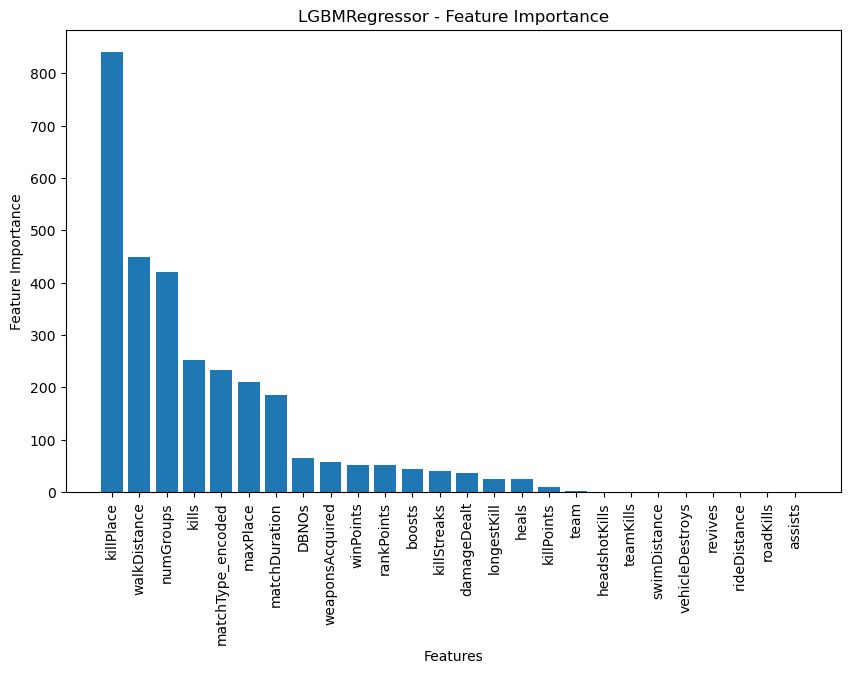

In [205]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
feature_importances = lg_reg.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
sorted_features = [X_train_tr.columns[i] for i in sorted_indices]
plt.bar(sorted_features, feature_importances[sorted_indices])
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("LGBMRegressor - Feature Importance")
plt.show()

# Conclusion:
 
 This is a feature importance bar graph which was mentioned in the problem statement of LGBM.

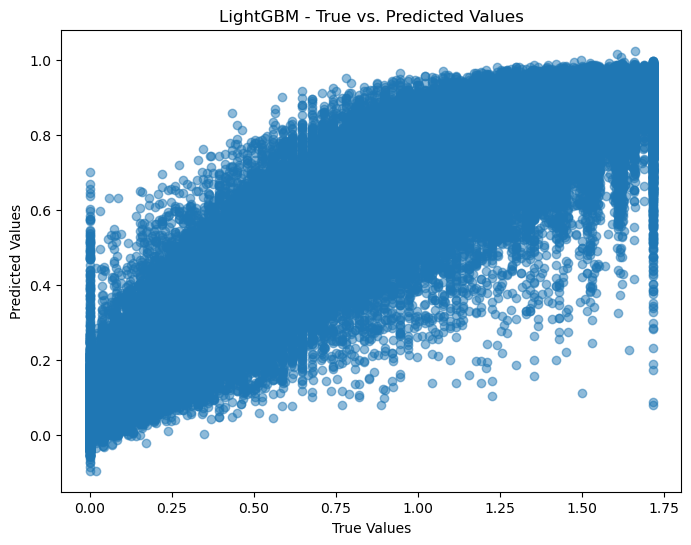

In [214]:
def plot_predictions(true_values, predicted_values, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(true_values, predicted_values, alpha=0.5)
    plt.title(f'{model_name} - True vs. Predicted Values')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.show()

# Now you can call the plot_predictions function
plot_predictions(Y_test_exp, pred_lg, "LightGBM")

## Report on Challenges faced:

To create a report which should include challenges you faced on data and what technique was used with proper reasoning.

1.Selecting the dataset: 

In this GAME AI project we were dealing with large datasets with (4446966, 29) rows and columns, 
our computing resources (CPU, memory, GPU, etc.) are not sufficient to process the entire dataset
in a reasonable amount of time. Thus we have come to a conclusion to take a random or systematic 
subset of the data (like 20%,30%,40%) that we can be able to  manage it.

After dividing the data we got the same result for each chunk so we have decided to work with (20%) of the dataset.


2.Kills :

As most of the people didn’t make any kills so we had to check if there are any Damagedealts. We have noticed that almost 3361 players are with 0 kills and 959 players are with 0 damage. If we take the percentage we can see almost 0.38% are with 0 kills and 0.11% are with 0 damage.

There were many players who win with 0 damage : 959
and also no. of players who win with 0 kills  : 3361



3.Walk Distance:

We have noticed that players have won even with 0 walk distance which is not possible. So we had to drop those players.

There were number of players win with 0 walk distance : 12434
and also number of players win with 0 walk and 0 kills: 1793

If the players were were won the match with 0 walk distance then we can say that there were hackers in our match,
So those players need to drop out from the match to get the win probability.



4.Dropping the Unnecessary Columns:

We have 29 columns out of these some of the columns are categorical and some of them are continuous columns. So we need to go through each column and decide which one to drop. 

So for this we have taken the 'CORRELATION_MATRIX'. Correlation matrix can help determine whether to drop or remove unused or unrelated features in a dataset by examining the relationships between features (variables).So far we have dropped 4 columns out of 29 columns : ('kills', 'numGroups', 'rankPoints', 'winPoints').



5.Outliers:

We have checked each column to see if there are outliers present or not. 

We have noticed several outliers are present so we have handled the same using capping IQR technique.


6.Difference in x train and y train:

We have determined the model performance whether it is overfitted or underfitted. So we worked on decreasing the error. 


7.Scaling:

In order to standardize the range or distribution we have scaled using Robust Scalar because it gives best results  when many outliers are present. 

Transformed our data using Power Transformer with YEO - johnson parameter to make the distribution more gaussian these are the features or variables in our dataset.


8.Hyperparameter tuning:

We have tried with Hyperparameter tuning but as the dataset is huge, it is taking much time to show the result.

we have used grid Search CV for the same.



9.Model selection:

We have to select the best fit model based on RMSLE , r2score, adjusted r2score, rmse, mse, mae and also plotted graph for prediction of the dataset.

LGBMregressor has give best results so far with 
   rmsle( root mean squared logarithmic error ) = 0.08392568333788064
  R2SCORE Test: 0.9093902078100292
  R2SCORE Train: 0.9103791549325735 
  
R2 diff = 0.9103791549325735 - 0.9093902078100292 = 0.0009889471225443


